# Using Diet Analysis to Predict Child Malnutrition - Capstone Project (Team Pyspark)

## EXPLORATORY DATA ANALYSIS 

In [1]:
#importing relevant modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#loading dataset curated from UNICEF data archives.

unicef = pd.read_csv('Nutrition Unicef.csv', low_memory = False)
unicef.head(10)

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,AGE:Current age,WEALTH_QUINTILE:Wealth Quintile,RESIDENCE:Residence,MATERNAL_EDU_LVL:Mother's Education Level,HEAD_OF_HOUSE:Head of House,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,REPORTING_LVL:Reporting level,INDICATOR_METADATA:Indicator metadata,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,SOURCE_LINK:Citation of or link to the data source,SERIES_FOOTNOTE:Series footnote,CUSTODIAN:Custodian,PUBLICATION_DATE:Date of Publication,DATA_SOURCE:Data Source,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,UPPER_BOUND:Upper Bound,STD_ERR:Standard Error,WGTD_SAMPL_SIZE:Weighted Sample Size,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,COVERAGE_TIME:The period of time for which data are provided,FREQ_COLL:Time interval at which the source data are collected,OBS_FOOTNOTE:Observation footnote
0,UNICEF:NUTRITION(1.0): Nutrition,AFG: Afghanistan,NT_BF_EBF: Ever breastfed (0-23 months),F: Female,M0T23: Under 24 months old,_T: Total,_T: Total,_T: Total,_T: Total,2015,98.2,NaN,https://data.unicef.org/indicator-profile/NT_B...,0: Units,PCNT: %,https://data.unicef.org/topic/nutrition/infant...,UNICEF Global Infant and Young Child Feeding D...,UNICEF Division of Data Analysis Planning an...,NaN,Afghanistan Demographic and Health Survey 2015...,RA: Reanalysed,F: Free,97.599998,98.699997,0.3,5537.0,MOF: Middle of fieldwork,2015-2018,0: Not Known,NaN
1,UNICEF:NUTRITION(1.0): Nutrition,AFG: Afghanistan,NT_BF_EBF: Ever breastfed (0-23 months),M: Male,M0T23: Under 24 months old,_T: Total,_T: Total,_T: Total,_T: Total,2015,97.4,NaN,https://data.unicef.org/indicator-profile/NT_B...,0: Units,PCNT: %,https://data.unicef.org/topic/nutrition/infant...,UNICEF Global Infant and Young Child Feeding D...,UNICEF Division of Data Analysis Planning an...,NaN,Afghanistan Demographic and Health Survey 2015...,RA: Reanalysed,F: Free,96.599998,98.000000,0.4,6001.9,MOF: Middle of fieldwork,2015-2018,0: Not Known,NaN
2,UNICEF:NUTRITION(1.0): Nutrition,AFG: Afghanistan,NT_BF_EBF: Ever breastfed (0-23 months),_T: Total,M0T23: Under 24 months old,B20: Bottom 20%,R: Rural,_T: Total,_T: Total,2015,98.6,NaN,https://data.unicef.org/indicator-profile/NT_B...,0: Units,PCNT: %,https://data.unicef.org/topic/nutrition/infant...,UNICEF Global Infant and Young Child Feeding D...,UNICEF Division of Data Analysis Planning an...,NaN,Afghanistan Demographic and Health Survey 2015...,RA: Reanalysed,F: Free,97.699997,99.199997,0.4,1958.6,MOF: Middle of fieldwork,2015-2018,0: Not Known,NaN
3,UNICEF:NUTRITION(1.0): Nutrition,AFG: Afghanistan,NT_BF_EBF: Ever breastfed (0-23 months),_T: Total,M0T23: Under 24 months old,B20: Bottom 20%,U: Urban,_T: Total,_T: Total,2015,99.1,NaN,https://data.unicef.org/indicator-profile/NT_B...,0: Units,PCNT: %,https://data.unicef.org/topic/nutrition/infant...,UNICEF Global Infant and Young Child Feeding D...,UNICEF Division of Data Analysis Planning an...,NaN,Afghanistan Demographic and Health Survey 2015...,RA: Reanalysed,F: Free,94.000000,99.900002,0.9,93.0,MOF: Middle of fieldwork,2015-2018,0: Not Known,NaN
4,UNICEF:NUTRITION(1.0): Nutrition,AFG: Afghanistan,NT_BF_EBF: Ever breastfed (0-23 months),_T: Total,M0T23: Under 24 months old,B40: Bottom 40%,R: Rural,_T: Total,_T: Total,2015,98.3,NaN,https://data.unicef.org/indicator-profile/NT_B...,0: Units,PCNT: %,https://data.unicef.org/topic/nutrition/infant...,UNICEF Global Infant and Young Child Feeding D...,UNICEF Division of Data Analysis Planning an...,NaN,Afghanistan Demographic and Health Survey 2015...,RA: Reanalysed,F: Free,97.599998,98.800003,0.3,4203.5,MOF: Middle of fieldwork,2015-2018,0: Not Known,NaN
5,UNICEF:NUTRITION(1.0): Nutrition,AFG: Afghanistan,NT_BF_EBF: Ever breastfed (0-23 months),_T: Total,M0T23: Under 24 months old,B40: Bottom 40%,U: Urban,_T: Total,_T: Total,2015,98.6,NaN,https://data.unicef.org/indicator-profile/NT_B...,0: 

In [4]:
unicef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255563 entries, 0 to 255562
Data columns (total 30 columns):
 #   Column                                                                          Non-Null Count   Dtype  
---  ------                                                                          --------------   -----  
 0   DATAFLOW                                                                        255563 non-null  object 
 1   REF_AREA:Geographic area                                                        255563 non-null  object 
 2   INDICATOR:Indicator                                                             255563 non-null  object 
 3   SEX:Sex                                                                         255563 non-null  object 
 4   AGE:Current age                                                                 255563 non-null  object 
 5   WEALTH_QUINTILE:Wealth Quintile                                                 255563 non-null  object 
 6   RESI

In [5]:
#sorting out and isolating as well as renaming the needed columns

unicef['Country'] = unicef['REF_AREA:Geographic area'].apply(lambda x: x[x.index(":")+1 :])
unicef['Indicator'] = unicef['INDICATOR:Indicator'].apply(lambda x: x[x.index(":")+1 :])
unicef['Residence'] = unicef['RESIDENCE:Residence'].apply(lambda x: x[x.index(":")+1 :])
unicef['Maternal_Education'] = unicef["MATERNAL_EDU_LVL:Mother's Education Level"].apply(lambda x: x[x.index(":")+1 :])

In [6]:
unicef.rename(columns = {'OBS_VALUE:Observation Value':'Observation_value'}, inplace = True)
unicef.rename(columns = {'TIME_PERIOD:Time period' : 'Year'}, inplace = True)

In [7]:
#rearranging the dataframe to suit the need

new_unicef = unicef[['Country','Year','Residence','Indicator','Maternal_Education','Observation_value']]

In [8]:
new_unicef.head(10)

,Country,Year,Residence,Indicator,Maternal_Education,Observation_value
0,Afghanistan,2015,Total,Ever breastfed (0-23 months),Total,98.2
1,Afghanistan,2015,Total,Ever breastfed (0-23 months),Total,97.4
2,Afghanistan,2015,Rural,Ever breastfed (0-23 months),Total,98.6
3,Afghanistan,2015,Urban,Ever breastfed (0-23 months),Total,99.1
4,Afghanistan,2015,Rural,Ever breastfed (0-23 months),Total,98.3
5,Afghanistan,2015,Urban,Ever breastfed (0-23 months),Total,98.6
6,Afghanistan,2015,Rural,Ever breastfed (0-23 months),Total,98.1
7,Afghanistan,2015,Urban,Ever breastfed (0-23 months),Total,97.7
8,Afghanistan,2015,Rural,Ever breastfed (0-23 months),Total,98.0
9,Afghanistan,2015,Urban,Ever breastfed (0-23 months),Total,97.0


In [9]:
#check out unique dates in the year column

new_unicef['Year'].unique()

array(['2015', '2018', '2007', '2009', '2017', '2005', '2011', '2019',
       '2010', '2016', '2006', '2013', '2012', '2014', '2004', '2008',
       '2019-03-14', '2019-11-07', '2020', '2018-04-02', '2018-10-23',
       '2018-02-10', '2018-09-13', '2019-08-12', '2019-08-27', '2022',
       '2010-09-07', '2010-09-10', '2021-09-30', '2021-10-10', '2021',
       '2011-09-30', '2013-02-16', '2019-03-27', '2005-07-02',
       '2013-06-16', '2005-12-31', '2011-12-31', '2019-01-24',
       '2012-01-06', '2012-08-06', '2010-06-12', '2010-08-01',
       '2018-03-13', '2018-04-09', '2019-01-15', '2019-09-15',
       '2015-02-14', '2015-12-31', '2012-04-01', '2012-03-22',
       '2006-01-01', '2006-01-30', '2015-05-22', '2015-09-05',
       '2018-07-24', '2018-09-27', '2010-08-22', '2010-10-24',
       '2016-01-15', '2016-05-11', '2016-12-01', '2020-04-16',
       '2020-12-11', '2006-03-28', '2006-11-01', '2010-06-05',
       '2010-10-29', '2012-04-11', '2012-07-16', '2016-05-15',
       '2016-10

In [10]:
#dropping the rows with unwanted date formats 

uni_df = new_unicef[~new_unicef['Year'].str.contains('-')]


uni_df['Year'].unique()

array(['2015', '2018', '2007', '2009', '2017', '2005', '2011', '2019',
       '2010', '2016', '2006', '2013', '2012', '2014', '2004', '2008',
       '2020', '2022', '2021'], dtype=object)

In [11]:
uni_df.head(10)

,Country,Year,Residence,Indicator,Maternal_Education,Observation_value
0,Afghanistan,2015,Total,Ever breastfed (0-23 months),Total,98.2
1,Afghanistan,2015,Total,Ever breastfed (0-23 months),Total,97.4
2,Afghanistan,2015,Rural,Ever breastfed (0-23 months),Total,98.6
3,Afghanistan,2015,Urban,Ever breastfed (0-23 months),Total,99.1
4,Afghanistan,2015,Rural,Ever breastfed (0-23 months),Total,98.3
5,Afghanistan,2015,Urban,Ever breastfed (0-23 months),Total,98.6
6,Afghanistan,2015,Rural,Ever breastfed (0-23 months),Total,98.1
7,Afghanistan,2015,Urban,Ever breastfed (0-23 months),Total,97.7
8,Afghanistan,2015,Rural,Ever breastfed (0-23 months),Total,98.0
9,Afghanistan,2015,Urban,Ever breastfed (0-23 months),Total,97.0


In [12]:
uni_df['Residence'].unique()

array([' Total', ' Rural', ' Urban'], dtype=object)

In [13]:
#converting Total to Suburban in the Residence column

uni_df['Residence'] = uni_df['Residence'].str.strip().replace('Total', 'Suburban')

uni_df['Residence'].unique()


C:\Users\B!\AppData\Local\Temp\ipykernel_20168\4149262995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_df['Residence'] = uni_df['Residence'].str.strip().replace('Total', 'Suburban')


array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [14]:
#check unique maternal education 

uni_df['Maternal_Education'].unique()

array([' Total', ' None and Primary',
       ' Secondary education (lower and upper secondary education)',
       ' Secondary and Higher', ' Tertiary education',
       ' Never attended an education programme / No schooling',
       ' Primary education'], dtype=object)

In [15]:
uni_df['Maternal_Education'].value_counts()

 Total                                                        217023
 Secondary and Higher                                           2438
 None and Primary                                               2252
 Primary education                                              2162
 Secondary education (lower and upper secondary education)      2116
 Never attended an education programme / No schooling           1877
 Tertiary education                                             1785
Name: Maternal_Education, dtype: int64

In [16]:
#convert maternal educational level to options

edu = {
    'Total': 'Educated',
    'Secondary and Higher':'Educated',
    'None and Primary':'Educated',
    'Primary education':'Educated',
    'Secondary education (lower and upper secondary education)':'Educated',
    'Never attended an education programme / No schooling':'Uneducated',
    'Tertiary education':'Educated'   
}

uni_df['Maternal_Education'] = uni_df['Maternal_Education'].str.strip().replace(edu)

uni_df['Maternal_Education'].unique()

C:\Users\B!\AppData\Local\Temp\ipykernel_20168\3404908290.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_df['Maternal_Education'] = uni_df['Maternal_Education'].str.strip().replace(edu)


array(['Educated', 'Uneducated'], dtype=object)

In [17]:
uni_df.head()

,Country,Year,Residence,Indicator,Maternal_Education,Observation_value
0,Afghanistan,2015,Suburban,Ever breastfed (0-23 months),Educated,98.2
1,Afghanistan,2015,Suburban,Ever breastfed (0-23 months),Educated,97.4
2,Afghanistan,2015,Rural,Ever breastfed (0-23 months),Educated,98.6
3,Afghanistan,2015,Urban,Ever breastfed (0-23 months),Educated,99.1
4,Afghanistan,2015,Rural,Ever breastfed (0-23 months),Educated,98.3


### Countries and Malnutrition indicators

In [18]:
#creating a pivot table for country and indicators 

ind = uni_df.pivot_table(index = 'Country', columns="Indicator", values= 'Observation_value', aggfunc = np.mean)
ind.head()

Indicator,Ever breastfed (0-23 months),Height-for-age <-2 SD (stunting),"Introduction to solid, semi-solid foods (6-8 months)",Mean BMI-for-age,Minimum meal frequency (children aged 6 to 23 months),Weight-for-age <-2 SD (Underweight),Weight-for-height <-2 SD (wasting),Weight-for-height <-3 SD (severe wasting),Weight-for-height >+2 SD (overweight)
Country,,,,,,,,,
Afghanistan,97.876744,40.892814,62.331250,0.020359,49.043333,21.196667,6.737333,2.518000,4.495808
Albania,94.934653,20.447566,83.045455,0.726592,45.434483,4.725094,6.292164,3.408955,21.263060
Algeria,88.318293,12.192115,82.196875,0.624373,43.395000,3.019355,3.615771,1.444444,12.687097
Angola,95.002439,36.257576,79.046667,0.003297,31.583333,18.648913,4.850000,1.069565,3.220879
Argentina,96.048387,7.988182,96.464286,0.614545,64.178571,2.046667,1.728333,0.488333,10.832727


In [19]:
ind = ind.reset_index()


ind.head(10)

Indicator,Country,Ever breastfed (0-23 months),Height-for-age <-2 SD (stunting),"Introduction to solid, semi-solid foods (6-8 months)",Mean BMI-for-age,Minimum meal frequency (children aged 6 to 23 months),Weight-for-age <-2 SD (Underweight),Weight-for-height <-2 SD (wasting),Weight-for-height <-3 SD (severe wasting),Weight-for-height >+2 SD (overweight)
0,Afghanistan,97.876744,40.892814,62.331250,0.020359,49.043333,21.196667,6.737333,2.518000,4.495808
1,Albania,94.934653,20.447566,83.045455,0.726592,45.434483,4.725094,6.292164,3.408955,21.263060
2,Algeria,88.318293,12.192115,82.196875,0.624373,43.395000,3.019355,3.615771,1.444444,12.687097
3,Angola,95.002439,36.257576,79.046667,0.003297,31.583333,18.648913,4.850000,1.069565,3.220879
4,Argentina,96.048387,7.988182,96.464286,0.614545,64.178571,2.046667,1.728333,0.488333,10.832727
5,Armenia,96.614286,16.075849,84.731818,0.595849,60.967857,4.012453,4.628679,2.103019,13.987170
6,Australia,90.400000,1.963636,NaN,0.790909,NaN,0.500000,0.200000,0.000000,8.811429
7,Azerbaijan,86.276316,21.670833,79.173333,0.557062,NaN,6.834197,5.092188,1.680729,13.635937
8,Bangladesh,97.765350,39.696725,65.478505,-0.657651,63.069595,34.281360,13.668262,2.879897,1.460800
9,Barbados,93.505000,7.708219,89.800000,0.129167,58.700000,3.323288,6.836232,2.002899,12.356522


In [20]:
ind.rename(columns = {' Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
ind.rename(columns = {' Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
ind.rename(columns = {' Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
ind.rename(columns = {' Mean BMI-for-age':'BMI_age'}, inplace = True)
ind.rename(columns = {' Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
ind.rename(columns = {' Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
ind.rename(columns = {' Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
ind.rename(columns = {' Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
ind.rename(columns = {' Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)


In [21]:
ind.head()

Indicator,Country,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
0,Afghanistan,97.876744,40.892814,62.331250,0.020359,49.043333,21.196667,6.737333,2.518000,4.495808
1,Albania,94.934653,20.447566,83.045455,0.726592,45.434483,4.725094,6.292164,3.408955,21.263060
2,Algeria,88.318293,12.192115,82.196875,0.624373,43.395000,3.019355,3.615771,1.444444,12.687097
3,Angola,95.002439,36.257576,79.046667,0.003297,31.583333,18.648913,4.850000,1.069565,3.220879
4,Argentina,96.048387,7.988182,96.464286,0.614545,64.178571,2.046667,1.728333,0.488333,10.832727


In [22]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         157 non-null    object 
 1   Breastfed       132 non-null    float64
 2   Stunting        150 non-null    float64
 3   Solid_Food      120 non-null    float64
 4   BMI_age         141 non-null    float64
 5   Meal_Frequency  103 non-null    float64
 6   Underweight     149 non-null    float64
 7   Wasting         151 non-null    float64
 8   Severe_wasting  149 non-null    float64
 9   Overweight      153 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.4+ KB


In [23]:
ind = ind.fillna(ind.mean())

C:\Users\B!\AppData\Local\Temp\ipykernel_20168\2784041466.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ind = ind.fillna(ind.mean())


In [24]:
ind.isnull().sum()

Indicator
Country           0
Breastfed         0
Stunting          0
Solid_Food        0
BMI_age           0
Meal_Frequency    0
Underweight       0
Wasting           0
Severe_wasting    0
Overweight        0
dtype: int64

In [25]:
order = ['Country', 'BMI_age', 'Breastfed', 'Solid_Food', 'Meal_Frequency', 'Severe_wasting', 'Underweight', 'Stunting', 'Wasting', 'Overweight']

In [26]:
ind = ind[order]
ind.head()

Indicator,Country,BMI_age,Breastfed,Solid_Food,Meal_Frequency,Severe_wasting,Underweight,Stunting,Wasting,Overweight
0,Afghanistan,0.020359,97.876744,62.331250,49.043333,2.518000,21.196667,40.892814,6.737333,4.495808
1,Albania,0.726592,94.934653,83.045455,45.434483,3.408955,4.725094,20.447566,6.292164,21.263060
2,Algeria,0.624373,88.318293,82.196875,43.395000,1.444444,3.019355,12.192115,3.615771,12.687097
3,Angola,0.003297,95.002439,79.046667,31.583333,1.069565,18.648913,36.257576,4.850000,3.220879
4,Argentina,0.614545,96.048387,96.464286,64.178571,0.488333,2.046667,7.988182,1.728333,10.832727


In [27]:
#convert to the pivot_table to csv

ind.to_csv('CountryIndicators.csv', index=False)

1.0 COUNTRIES AND SEVERE WASTING

In [28]:
#grouping country by severe wasting value

csw = ind.groupby('Country')['Severe_wasting'].mean().sort_values(ascending = False).reset_index(name = 'Severe_wasting')
csw.head()

,Country,Severe_wasting
0,South Sudan,10.157391
1,India,7.072930
2,Papua New Guinea,6.382456
3,Indonesia,5.774265
4,Syrian Arab Republic,5.107222


                 Country  Severe_wasting
0                  Sudan        4.275962
1                  Libya        4.282857
2                Somalia        4.330137
3                Comoros        4.401075
4                  Yemen        4.817470
5   Syrian Arab Republic        5.107222
6              Indonesia        5.774265
7       Papua New Guinea        6.382456
8                  India        7.072930
9            South Sudan       10.157391


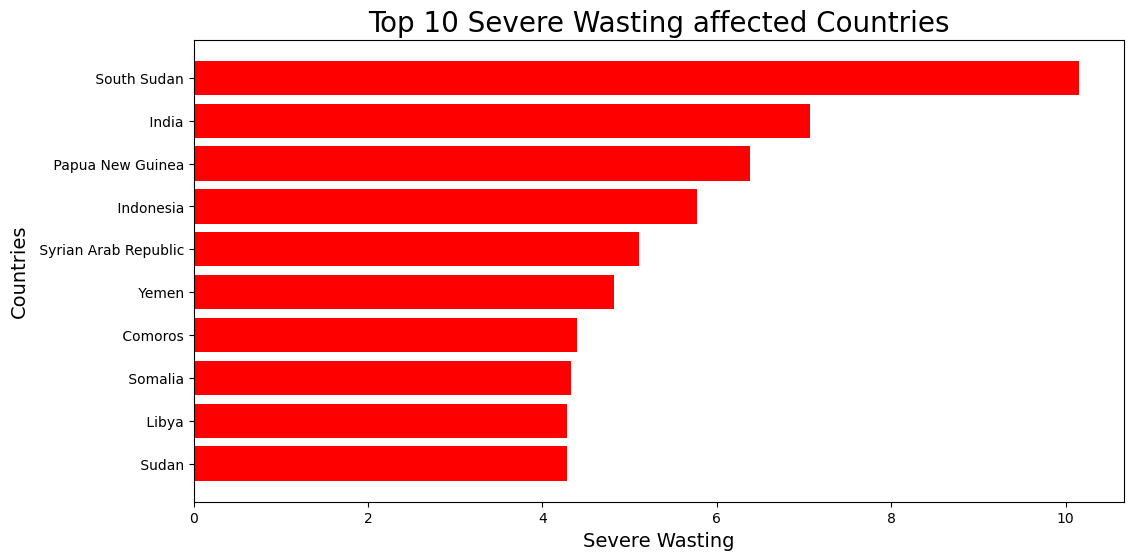

In [29]:
#getting the most affected severe wasting countries

csw1 = ind.groupby('Country')['Severe_wasting'].mean().nlargest(10).sort_values(ascending = True).reset_index(name = 'Severe_wasting')
print(csw1)

plt.figure(figsize = [12,6])
plt.barh(csw1['Country'], csw1['Severe_wasting'], color = 'r')
plt.title('Top 10 Severe Wasting affected Countries', fontsize = 20)
plt.xlabel('Severe Wasting', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MaxCountrySevereWasting', bbox_inches = 'tight', dpi = 300)

From the chart above, South Sudan is the country affected mostly by Severe wasting with a score of 10.1, followed by India with 7.0 score and Papua New Guinea with 6.38.

                     Country  Severe_wasting
0                   Portugal        0.100000
1             United Kingdom        0.075000
2   Turks and Caicos Islands        0.068750
3                    Estonia        0.063095
4              United States        0.055556
5          Republic of Korea        0.040000
6                  Australia        0.000000
7                    Belgium        0.000000
8                     Latvia        0.000000
9                     Poland        0.000000


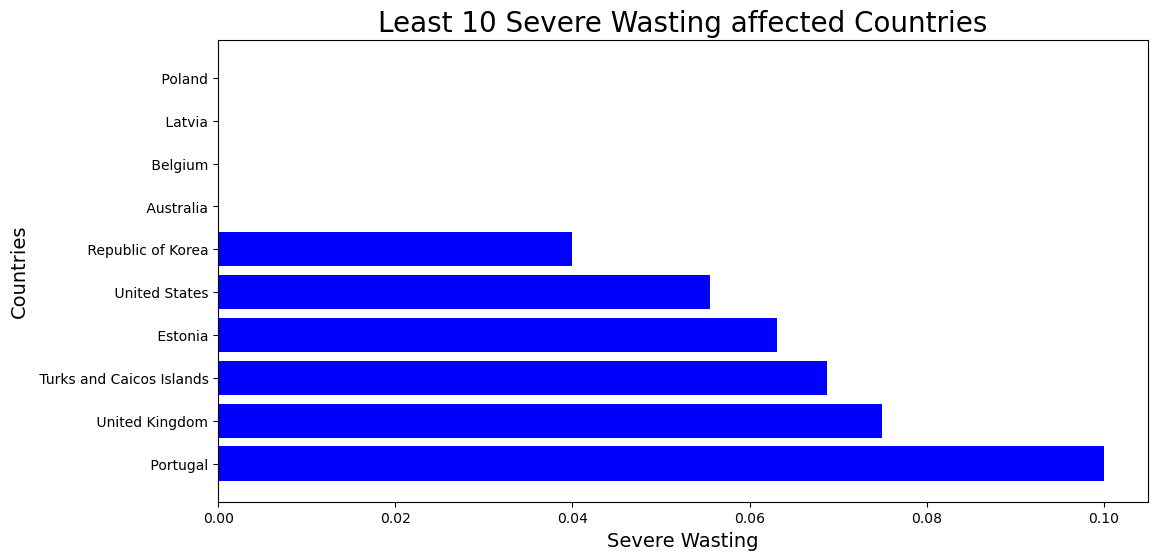

In [30]:
#getting the least affected severe wasting countries

csw2 = ind.groupby('Country')['Severe_wasting'].mean().nsmallest(10).sort_values(ascending = False).reset_index(name = 'Severe_wasting')
print(csw2)

plt.figure(figsize = [12,6])
plt.barh(csw2['Country'], csw2['Severe_wasting'], color = 'b')
plt.title('Least 10 Severe Wasting affected Countries', fontsize = 20)
plt.xlabel('Severe Wasting', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MinCountrySevereWasting', bbox_inches = 'tight', dpi = 300)

This chart offers insight to the countires experiencing the least severe wasting. Poland, Latvia, and Belgium have zero case of severe wasting 

2.0 COUNTRIES AND UNDERWEIGHT

In [31]:
#grouping countries by underweight values

cuw = ind.groupby('Country')['Underweight'].mean().sort_values(ascending = False).reset_index(name = 'Underweight')
cuw.head()

,Country,Underweight
0,Timor-Leste,40.056509
1,Eritrea,38.521839
2,Yemen,38.071084
3,India,35.695541
4,Bangladesh,34.281360


        Country  Underweight
0       Somalia    28.391096
1         Nepal    28.487817
2    Madagascar    29.111846
3         Sudan    29.899038
4         Niger    33.877863
5    Bangladesh    34.281360
6         India    35.695541
7         Yemen    38.071084
8       Eritrea    38.521839
9   Timor-Leste    40.056509


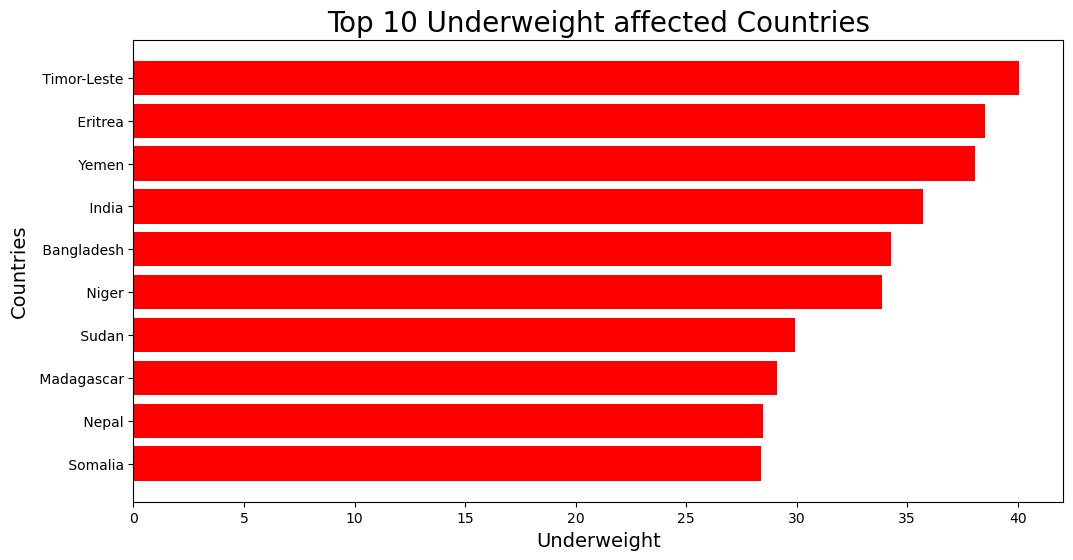

In [32]:
#getting the most affected underweight countries

cuw1 = ind.groupby('Country')['Underweight'].mean().nlargest(10).sort_values(ascending = True).reset_index(name = 'Underweight')
print(cuw1)

plt.figure(figsize = [12,6])
plt.barh(cuw1['Country'], cuw1['Underweight'], color = 'r')
plt.title('Top 10 Underweight affected Countries', fontsize = 20)
plt.xlabel('Underweight', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MaxCountryUnderweight', bbox_inches = 'tight', dpi = 300)

The top countries having the most underweight cases over the time period are Timor-Leste with 40.05, Eritrea with 38.5, and Yemen with 38.07 followed by India with a score of 35.6

                     Country  Underweight
0                      Tonga     0.950000
1                   Portugal     0.900000
2              United States     0.850000
3                     Poland     0.800000
4          Republic of Korea     0.725000
5                      Chile     0.540000
6                    Estonia     0.534524
7                  Australia     0.500000
8   Turks and Caicos Islands     0.416667
9                     Latvia     0.000000


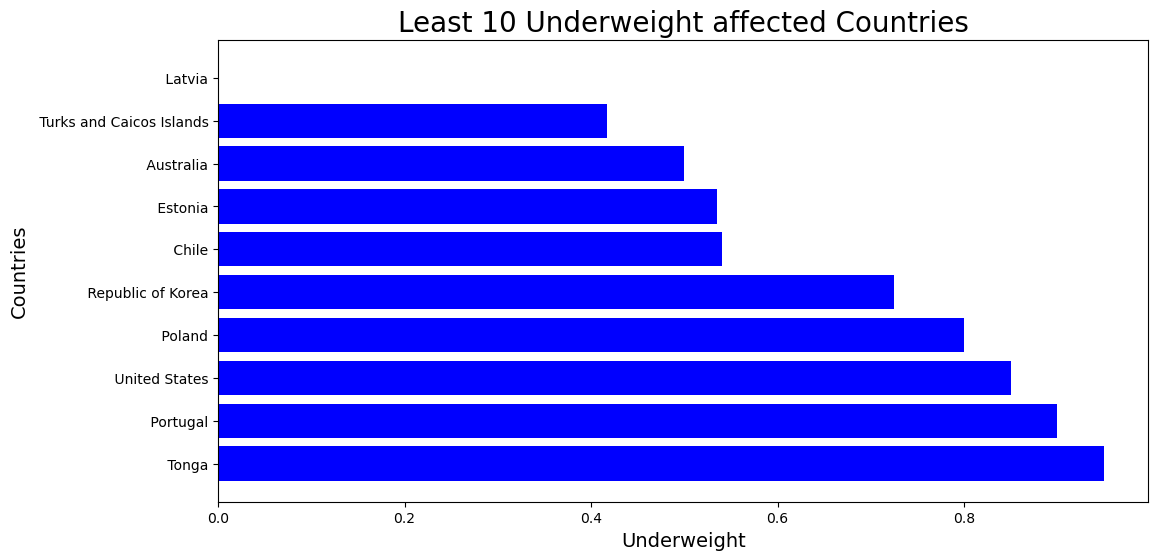

In [33]:
#getting the least affected underweight countries

cuw2 = ind.groupby('Country')['Underweight'].mean().nsmallest(10).sort_values(ascending = False).reset_index(name = 'Underweight')
print(cuw2)

plt.figure(figsize = [12,6])
plt.barh(cuw2['Country'], cuw2['Underweight'], color = 'b')
plt.title('Least 10 Underweight affected Countries', fontsize = 20)
plt.xlabel('Underweight', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MinCountryUnderweight', bbox_inches = 'tight', dpi = 300)

Latvia is safe and has no case of Underweight at all. Turks and Caicos islands, Austraila and Estonia comes next in the list of countries not having underweight cases amongst their children with scores of 0.4, 0.5 and 0.5e respectively.

3.0 COUNTRIES AND WASTING

In [34]:
#getting countries and their wasting values

cw = ind.groupby('Country')['Wasting'].mean().sort_values(ascending = False).reset_index(name = 'Wasting')
cw.head()

,Country,Wasting
0,South Sudan,22.457391
1,India,19.428981
2,Sri Lanka,15.991304
3,Yemen,15.239759
4,Sudan,15.218269


             Country    Wasting
0        Timor-Leste  13.817456
1   Papua New Guinea  13.903509
2          Indonesia  13.909559
3           Djibouti  14.212500
4            Eritrea  14.437647
5              Sudan  15.218269
6              Yemen  15.239759
7          Sri Lanka  15.991304
8              India  19.428981
9        South Sudan  22.457391


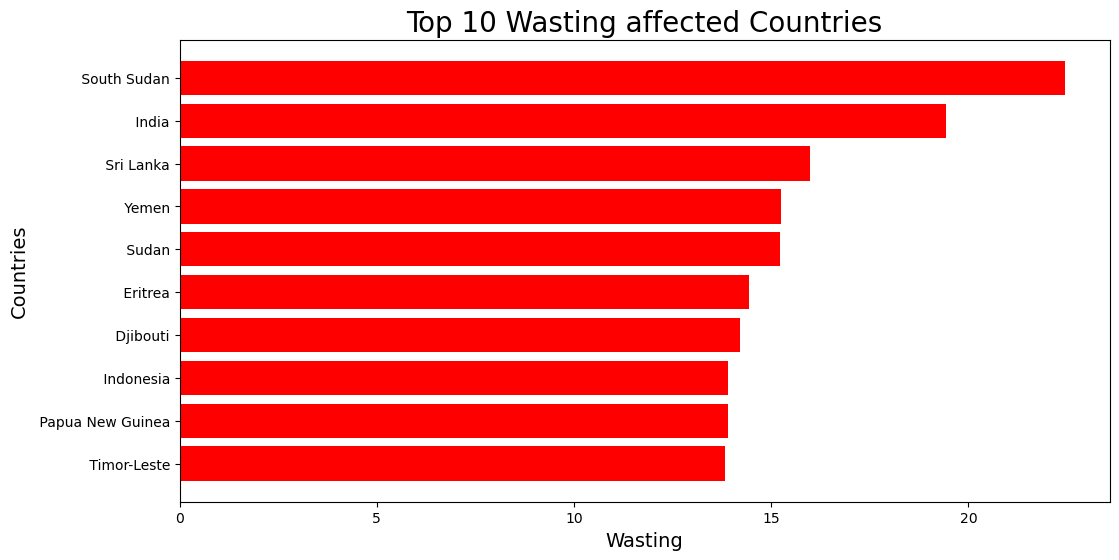

In [35]:
#getting the most wasting affected countries

cw1 = ind.groupby('Country')['Wasting'].mean().nlargest(10).sort_values(ascending = True).reset_index(name = 'Wasting')
print(cw1)

plt.figure(figsize = [12,6])
plt.barh(cw1['Country'], cw1['Wasting'], color = 'r')
plt.title('Top 10 Wasting affected Countries', fontsize = 20)
plt.xlabel('Wasting', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MaxCountryWasting', bbox_inches = 'tight', dpi = 300)


Again, South Sudan tops the chart of most countries with wastin cases with a score of 22.4. India follows closely with a score of 19.4 then Sri lanka with a score of 15.9

                     Country   Wasting
0                  Guatemala  1.001562
1                     Poland  0.900000
2   Turks and Caicos Islands  0.772917
3                       Peru  0.583447
4          Republic of Korea  0.560000
5              United States  0.462500
6                    Belgium  0.400000
7                      Chile  0.310000
8                  Australia  0.200000
9             United Kingdom  0.175000


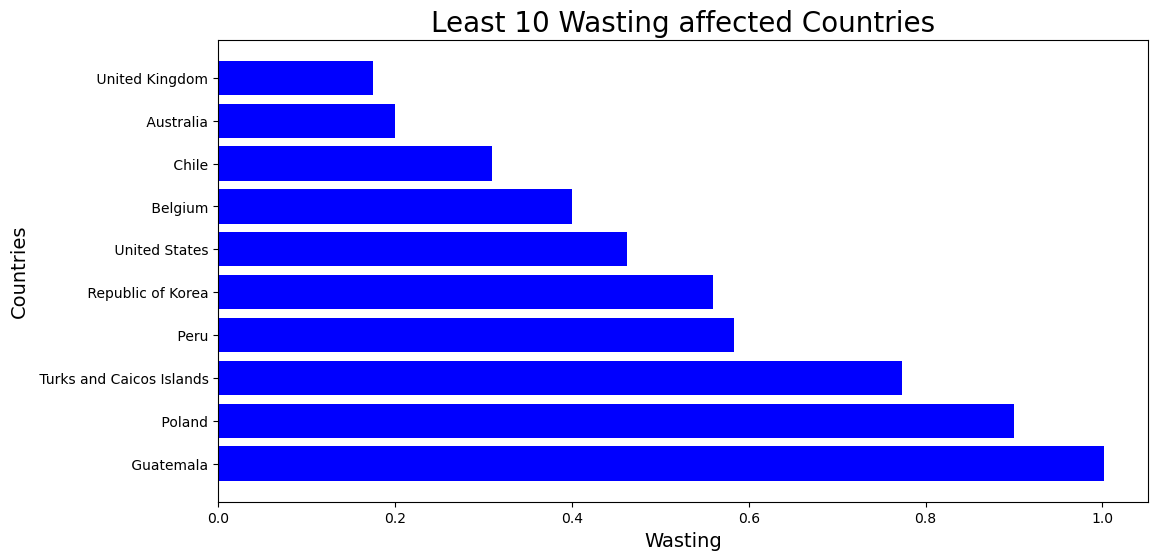

In [36]:
#getting the least wasting affected countries
cw2 = ind.groupby('Country')['Wasting'].mean().nsmallest(10).sort_values(ascending = False).reset_index(name = 'Wasting')
print(cw2)

plt.figure(figsize = [12,6])
plt.barh(cw2['Country'], cw2['Wasting'], color = 'b')
plt.title('Least 10 Wasting affected Countries', fontsize = 20)
plt.xlabel('Wasting', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MinCountryWasting', bbox_inches = 'tight', dpi = 300)

The charts above shows that some countries such as the United Kingdom, Austraila and Chile boasts of having the least wasting cases with wasting scores 0f 0.17, 0.20 and 0.31 respectively.

4.0 COUNTRIES AND STUNTING

In [37]:
#grouping countries and their stunting values

cs = ind.groupby('Country')['Stunting'].mean().sort_values(ascending = False).reset_index(name = 'Stunting')
cs.head()

,Country,Stunting
0,Burundi,54.313314
1,Timor-Leste,52.624852
2,Eritrea,51.012644
3,Yemen,49.353012
4,Guatemala,49.283582


                             Country   Stunting
0   Democratic Republic of the Congo  42.792077
1                             Malawi  43.996950
2                              Niger  44.866620
3                         Madagascar  45.815132
4                   Papua New Guinea  47.218421
5                          Guatemala  49.283582
6                              Yemen  49.353012
7                            Eritrea  51.012644
8                        Timor-Leste  52.624852
9                            Burundi  54.313314


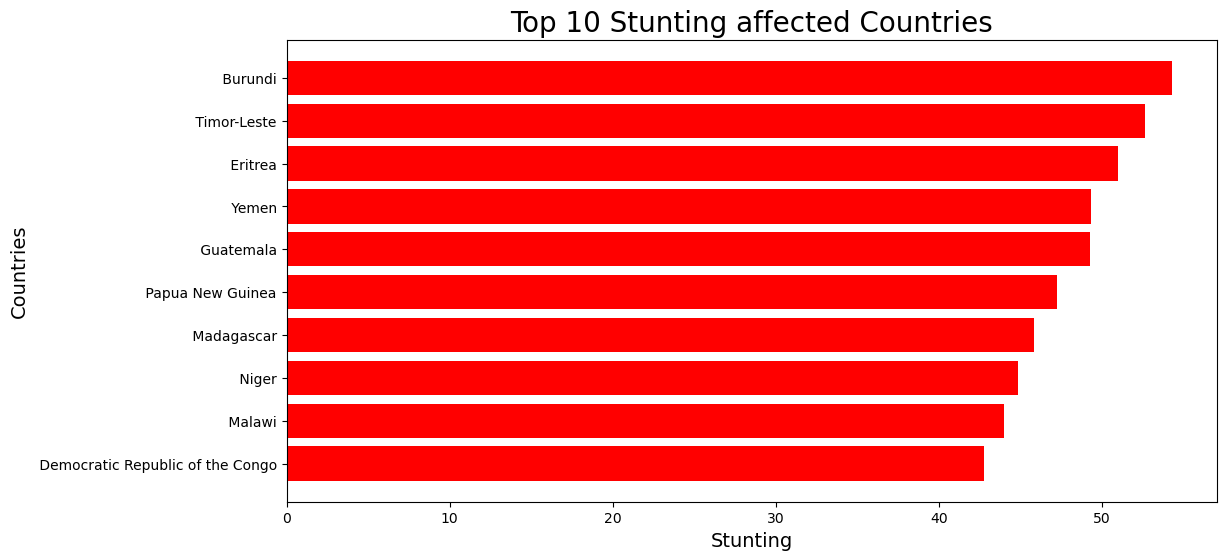

In [38]:
#getting the most affected countries by stunting

cs1 = ind.groupby('Country')['Stunting'].mean().nlargest(10).sort_values(ascending = True).reset_index(name = 'Stunting')
print(cs1)

plt.figure(figsize = [12,6])
plt.barh(cs1['Country'], cs1['Stunting'], color = 'r')
plt.title('Top 10 Stunting affected Countries', fontsize = 20)
plt.xlabel('Stunting', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MaxCountryStunting', bbox_inches = 'tight', dpi = 300)


Stunting cases are on the rise but the most affected countries happen to be Burundi with a score of 54.3, Timor-Leste with 52.6 and then Eritrea with score of 51.0 

                         Country  Stunting
0                    Saint Lucia  2.527869
1                      Australia  1.963636
2                          Chile  1.930000
3                        Belgium  1.758333
4              Republic of Korea  1.610702
5   Netherlands (Kingdom of the)  1.505556
6                        Germany  1.216364
7                        Estonia  1.175000
8                         Poland  0.940625
9                         Latvia  0.542105


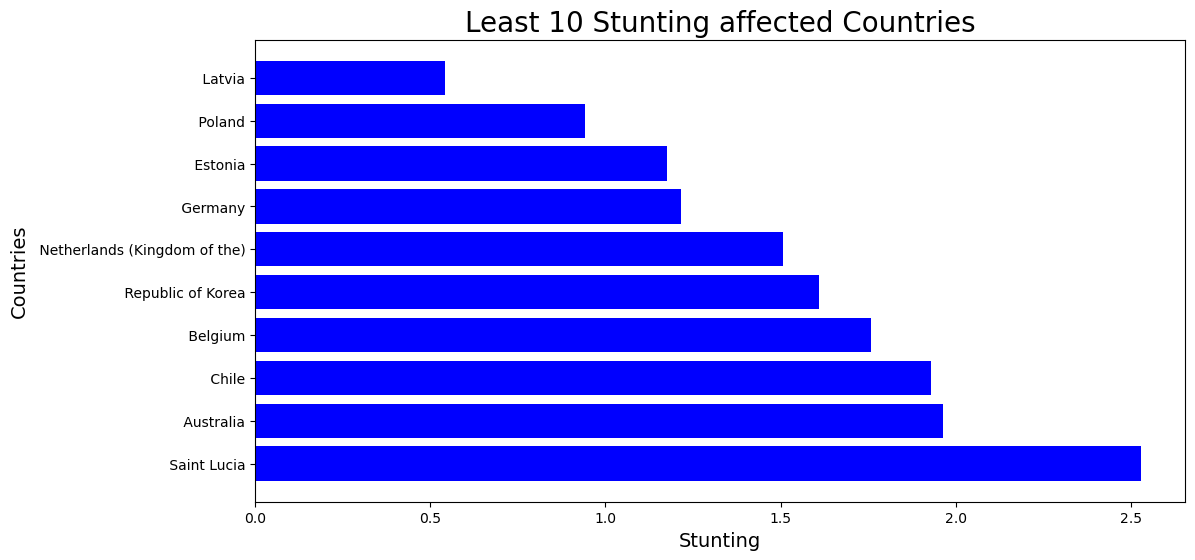

In [39]:
#getting the least affected countries by stunting

cs2 = ind.groupby('Country')['Stunting'].mean().nsmallest(10).sort_values(ascending = False).reset_index(name = 'Stunting')
print(cs2)

plt.figure(figsize = [12,6])
plt.barh(cs2['Country'], cs2['Stunting'], color = 'b')
plt.title('Least 10 Stunting affected Countries', fontsize = 20)
plt.xlabel('Stunting', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MinCountryStunting', bbox_inches = 'tight', dpi = 300)

Some countries seems less affected by the high rise of stunting cases. Latvia, Poland, Estonia and Germany happens to sit comfortably on the top of the least affected with scores of 0.54, 0.94, 1.17 and 1.21 respectively.

5.0 COUNTRIES AND OVERWEIGHT

In [40]:
#grouping countries by their overweight values

cow = ind.groupby('Country')['Overweight'].mean().sort_values(ascending = False).reset_index(name = 'Overweight')
cow.head()

,Country,Overweight
0,Libya,25.185714
1,Bosnia and Herzegovina,21.348913
2,Albania,21.263060
3,Syrian Arab Republic,18.114444
4,Russian Federation,17.620000


                     Country  Overweight
0                    Tunisia   14.957005
1                 Montenegro   15.240000
2                    Georgia   15.462996
3                      Egypt   16.743321
4   Turks and Caicos Islands   17.335417
5         Russian Federation   17.620000
6       Syrian Arab Republic   18.114444
7                    Albania   21.263060
8     Bosnia and Herzegovina   21.348913
9                      Libya   25.185714


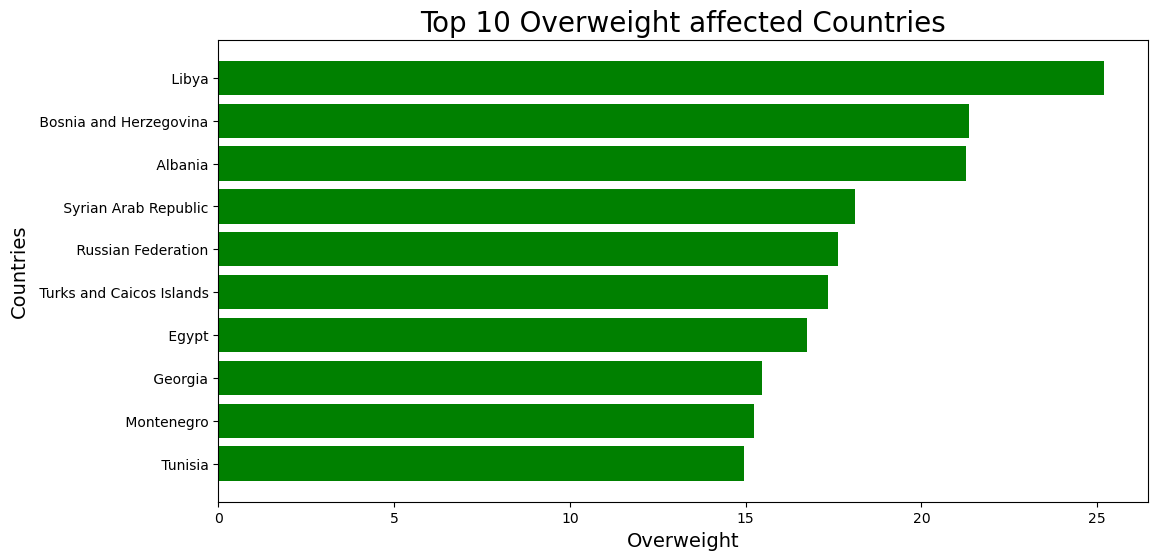

In [41]:
#getting the most affected countries by overweight

cow1 = ind.groupby('Country')['Overweight'].mean().nlargest(10).sort_values(ascending = True).reset_index(name = 'Overweight')
print(cow1)

plt.figure(figsize = [12,6])
plt.barh(cow1['Country'], cow1['Overweight'], color = 'g')
plt.title('Top 10 Overweight affected Countries', fontsize = 20)
plt.xlabel('Overweight', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MaxCountryOverweight', bbox_inches = 'tight', dpi = 300)


In Libya, there is a very high case of overweight with a score of 25.1. Other countries most affected are Bosnia and Herzegovina with score of 21.3 follwed by Albania with 21.2. The chart above portrays this.

                                  Country  Overweight
0                              Mauritania    1.654545
1                                 Myanmar    1.650388
2                                    Togo    1.635842
3                               Sri Lanka    1.531304
4                                    Mali    1.520097
5                              Bangladesh    1.460800
6   Democratic People's Republic of Korea    1.203704
7                            Burkina Faso    1.071014
8                                   Niger    0.755021
9                                Djibouti    0.743038


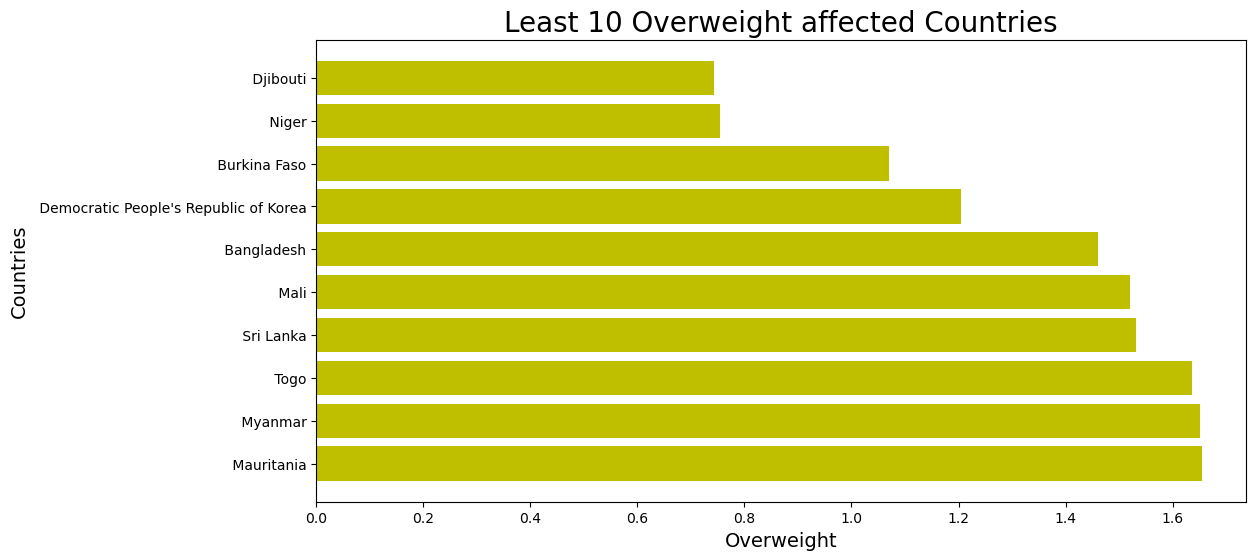

In [42]:
cow2 = ind.groupby('Country')['Overweight'].mean().nsmallest(10).sort_values(ascending = False).reset_index(name = 'Overweight')
print(cow2)

plt.figure(figsize = [12,6])
plt.barh(cow2['Country'], cow2['Overweight'], color = 'y')
plt.title('Least 10 Overweight affected Countries', fontsize = 20)
plt.xlabel('Overweight', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MinCountryOverweight', bbox_inches = 'tight', dpi = 300)

Overweight seems not to be popular amongst kids in Djibouti, Niger and Burkina Faso because their scores seems the lowest sitting at 0.74, 0.75 and 1.07 respectively.

6.0 COUNTRIES AND THEIR AVERAGE BODY MASS INDEX per AGE

In [43]:
#grouping countries by their BMI_age value

cbmi = ind.groupby('Country')['BMI_age'].mean().sort_values(ascending = False).reset_index(name= 'BMI')
cbmi.head()

,Country,BMI
0,Bosnia and Herzegovina,0.844565
1,Tonga,0.838889
2,Georgia,0.811013
3,Mongolia,0.794824
4,Australia,0.790909


                   Country       BMI
0               Montenegro  0.705926
1                    Libya  0.719048
2                  Albania  0.726592
3                 Eswatini  0.747985
4                  Tunisia  0.771014
5                Australia  0.790909
6                 Mongolia  0.794824
7                  Georgia  0.811013
8                    Tonga  0.838889
9   Bosnia and Herzegovina  0.844565


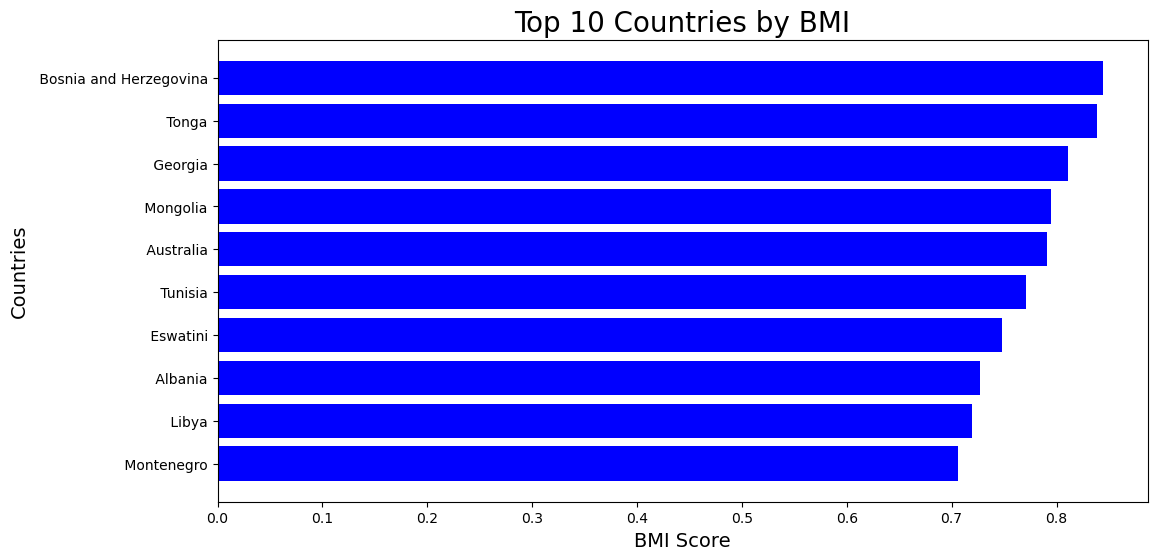

In [44]:
#getting the top countries by bmi

cbmi1 =  ind.groupby('Country')['BMI_age'].mean().nlargest(10).sort_values(ascending = True).reset_index(name= 'BMI')
print(cbmi1)

plt.figure(figsize = [12,6])
plt.barh(cbmi1['Country'], cbmi1['BMI'], color = 'b')
plt.title('Top 10 Countries by BMI', fontsize = 20)
plt.xlabel('BMI Score', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MaxCountryBMI', bbox_inches = 'tight', dpi = 300)

        Country       BMI
0         Nepal -0.534140
1    Mauritania -0.544132
2   Timor-Leste -0.574627
3         Niger -0.600424
4         Sudan -0.631250
5   South Sudan -0.636522
6    Bangladesh -0.657651
7      Djibouti -0.664557
8         India -0.790288
9     Sri Lanka -0.871739


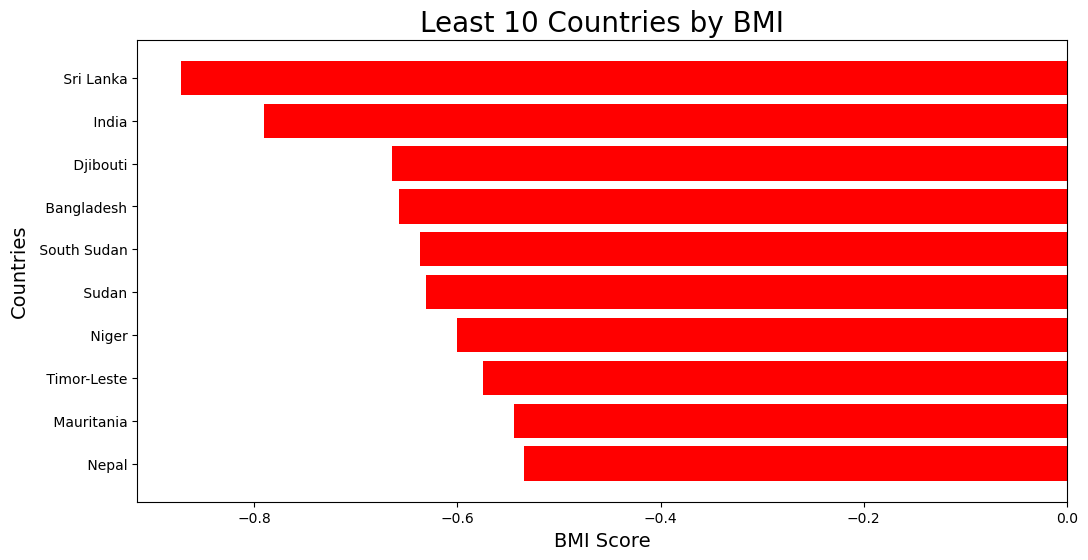

In [45]:
#getting the least countries by bmi

cbmi2 =  ind.groupby('Country')['BMI_age'].mean().nsmallest(10).sort_values(ascending = False).reset_index(name= 'BMI')
print(cbmi2)

plt.figure(figsize = [12,6])
plt.barh(cbmi2['Country'], cbmi2['BMI'], color = 'r')
plt.title('Least 10 Countries by BMI', fontsize = 20)
plt.xlabel('BMI Score', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MinCountryBMI', bbox_inches = 'tight', dpi = 300)

7.0 COUNTRIES BY MINUMIUM MEAL FREQUENCY

In [46]:
#grouping countries by meal frequency

mmf = ind.groupby('Country')['Meal_Frequency'].mean().sort_values(ascending = False).reset_index(name = 'Meal_Freq')
mmf.head()

,Country,Meal_Freq
0,Turkmenistan,94.847059
1,Serbia,90.761628
2,El Salvador,86.556667
3,Honduras,85.440000
4,Guatemala,82.396667


         Country  Meal_Freq
0       Thailand  76.951136
1         Mexico  78.316667
2     Madagascar  78.892857
3        Belarus  80.929310
4     Montenegro  81.310909
5      Guatemala  82.396667
6       Honduras  85.440000
7    El Salvador  86.556667
8         Serbia  90.761628
9   Turkmenistan  94.847059


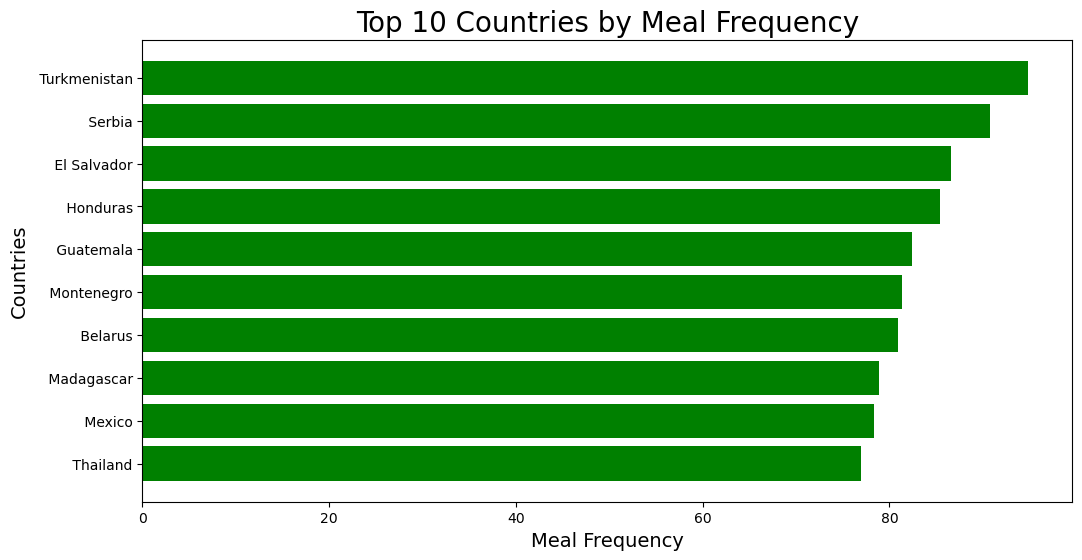

In [47]:
#getting countries with highest meal frequency

mmf1= ind.groupby('Country')['Meal_Frequency'].mean().nlargest(10).sort_values(ascending = True).reset_index(name = 'Meal_Freq')
print(mmf1)

plt.figure(figsize = [12,6])
plt.barh(mmf1['Country'], mmf1['Meal_Freq'], color = 'g')
plt.title('Top 10 Countries by Meal Frequency', fontsize = 20)
plt.xlabel('Meal Frequency', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MaxMealFreq', bbox_inches = 'tight', dpi = 300)

Turkmenistan, Serbia and El Salvador happen to be countries that the highest scores for the minimum meal frequency. This implies that they do not miss meals. The scores are 94.8, 90.7 and 86.5 respectively. 

                             Country  Meal_Freq
0   Democratic Republic of the Congo  30.048864
1                               Mali  28.988696
2                         Mauritania  28.371429
3                            Comoros  28.023333
4                              Congo  27.492857
5                             Guinea  26.380682
6                            Liberia  26.159322
7                         Uzbekistan  23.944444
8           Central African Republic  22.593548
9                        South Sudan  10.834483


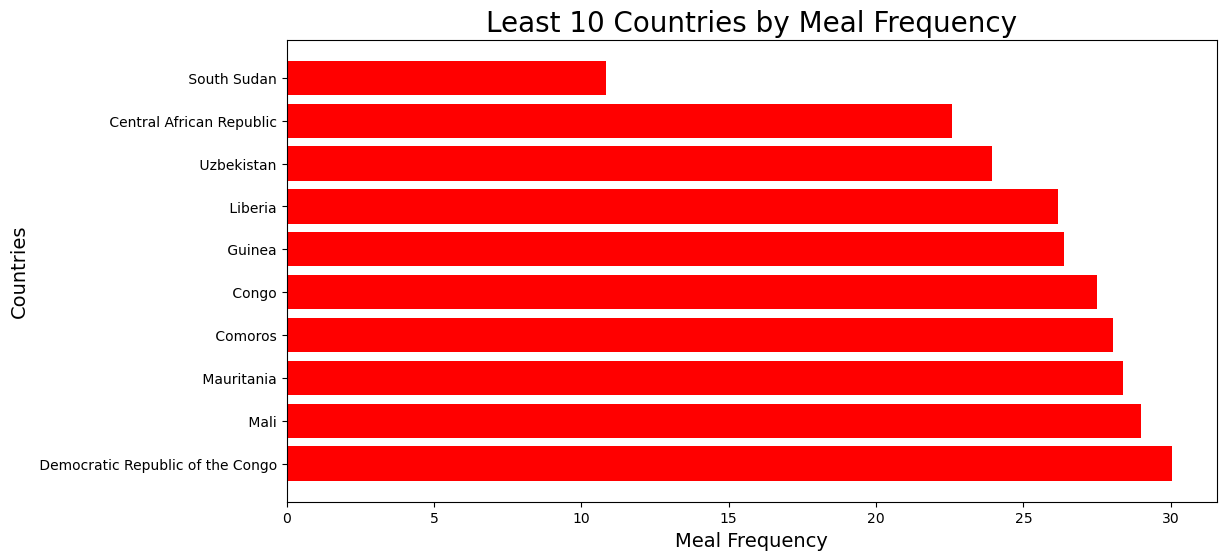

In [48]:
#getting countries with lowest meal frequency

mmf2= ind.groupby('Country')['Meal_Frequency'].mean().nsmallest(10).sort_values(ascending= False).reset_index(name= 'Meal_Freq')
print(mmf2)

plt.figure(figsize = [12,6])
plt.barh(mmf2['Country'], mmf2['Meal_Freq'], color = 'r')
plt.title('Least 10 Countries by Meal Frequency', fontsize = 20)
plt.xlabel('Meal Frequency', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MinMealFreq', bbox_inches = 'tight', dpi = 300)

There are countries that can not boast of the fact that they do not miss meals. South Sudan, Central African Republic and Uzbekistan happens to be the top 3 of least countries with minimum meal frequency. 

8.0 COUNTRIES AND BREASTFEEDING 

In [49]:
#grouping countries by breastfeeding pattern

cbf = ind.groupby('Country')['Breastfed'].mean().sort_values(ascending = False).reset_index(name = 'Breastfed')
cbf.head()

,Country,Breastfed
0,Democratic People's Republic of Korea,99.425000
1,Sri Lanka,99.350000
2,Bhutan,99.015942
3,Burkina Faso,98.910390
4,Uruguay,98.787879


                                  Country  Breastfed
0                                  Gambia  98.360937
1                            Turkmenistan  98.406316
2                                   Nepal  98.466341
3                                 Burundi  98.560494
4                                   Ghana  98.572308
5                                 Uruguay  98.787879
6                            Burkina Faso  98.910390
7                                  Bhutan  99.015942
8                               Sri Lanka  99.350000
9   Democratic People's Republic of Korea  99.425000


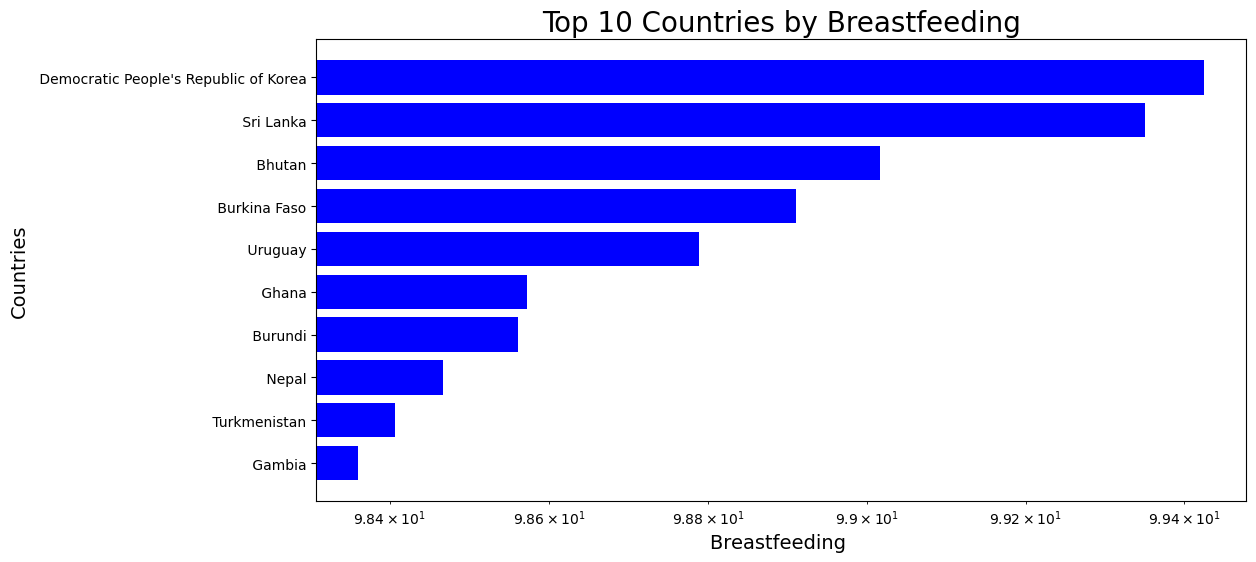

In [50]:
#getting the top breastfeeding countries

cbf1 = ind.groupby('Country')['Breastfed'].mean().nlargest(10).sort_values(ascending = True).reset_index(name = 'Breastfed')
print(cbf1)


plt.figure(figsize = [12,6])
plt.xscale('log')
plt.barh(cbf1['Country'], cbf1['Breastfed'], color = 'b')
plt.title('Top 10 Countries by Breastfeeding', fontsize = 20)
plt.xlabel('Breastfeeding ', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MaxBreastfed', bbox_inches = 'tight', dpi = 300)

No doubt that breastfeeding affects the nutritional growth of a child. Countries that boast of consistent breastfeeding are Democratic People's Republic of Korea with score of 99.4, followed by Sri Lanka with 99.3 and then Bhutan with 99.1. 

             Country  Breastfed
0   Papua New Guinea  88.725641
1         Montenegro  88.459406
2            Algeria  88.318293
3            Romania  88.300000
4   Marshall Islands  88.127273
5             Guyana  88.058772
6         Azerbaijan  86.276316
7       South Africa  82.225000
8           Botswana  80.500000
9      United States  72.666667


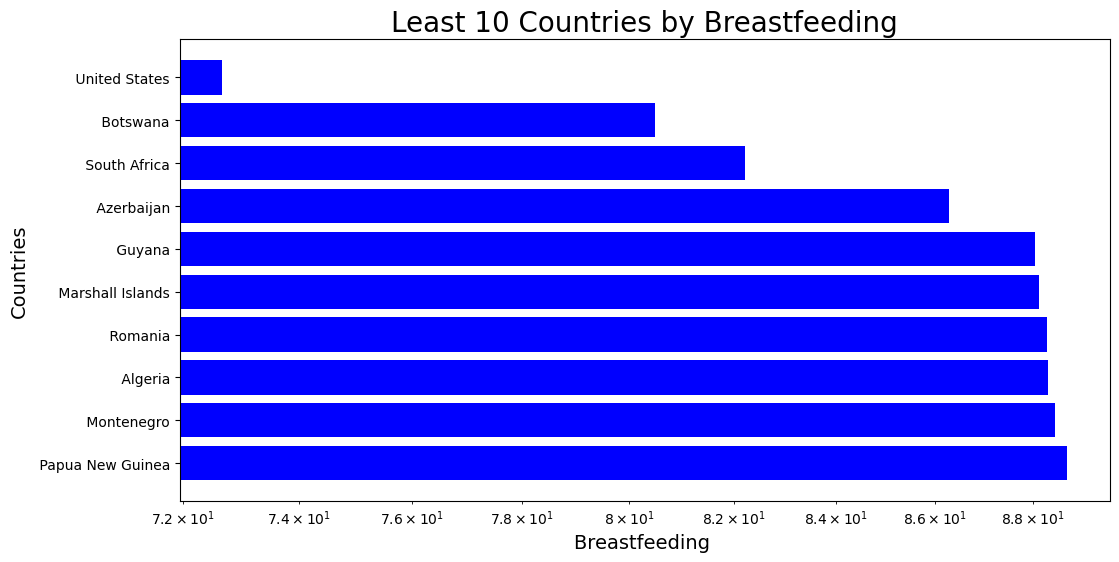

In [51]:
#getting the least breastfeeding countries

cbf2 = ind.groupby('Country')['Breastfed'].mean().nsmallest(10).sort_values(ascending = False).reset_index(name = 'Breastfed')
print(cbf2)


plt.figure(figsize = [12,6])
plt.xscale('log')
plt.barh(cbf2['Country'], cbf2['Breastfed'], color = 'b')
plt.title('Least 10 Countries by Breastfeeding', fontsize = 20)
plt.xlabel('Breastfeeding ', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MinBreastfed', bbox_inches = 'tight', dpi = 300)

The United States sits on the top of countries that has reduced breastfeeding with a score of 72.6, followed by Botswana with 80.5 and South Africa with score of 82.2

9.0 COUNTRIES AND EARLY INTRODUCTION TO SOLID FOODS

In [52]:
#grouping countries by solid food

isf = ind.groupby('Country')['Solid_Food'].mean().sort_values(ascending = False).reset_index(name = 'Solid_Food')
isf.head()

,Country,Solid_Food
0,Argentina,96.464286
1,Belarus,95.391667
2,Costa Rica,94.512500
3,Brazil,94.100000
4,Sri Lanka,93.784615


                        Country  Solid_Food
0                      Eswatini   91.450000
1                       Uruguay   92.133333
2   United Republic of Tanzania   92.134375
3                      Maldives   92.222727
4                          Oman   92.400000
5                     Sri Lanka   93.784615
6                        Brazil   94.100000
7                    Costa Rica   94.512500
8                       Belarus   95.391667
9                     Argentina   96.464286


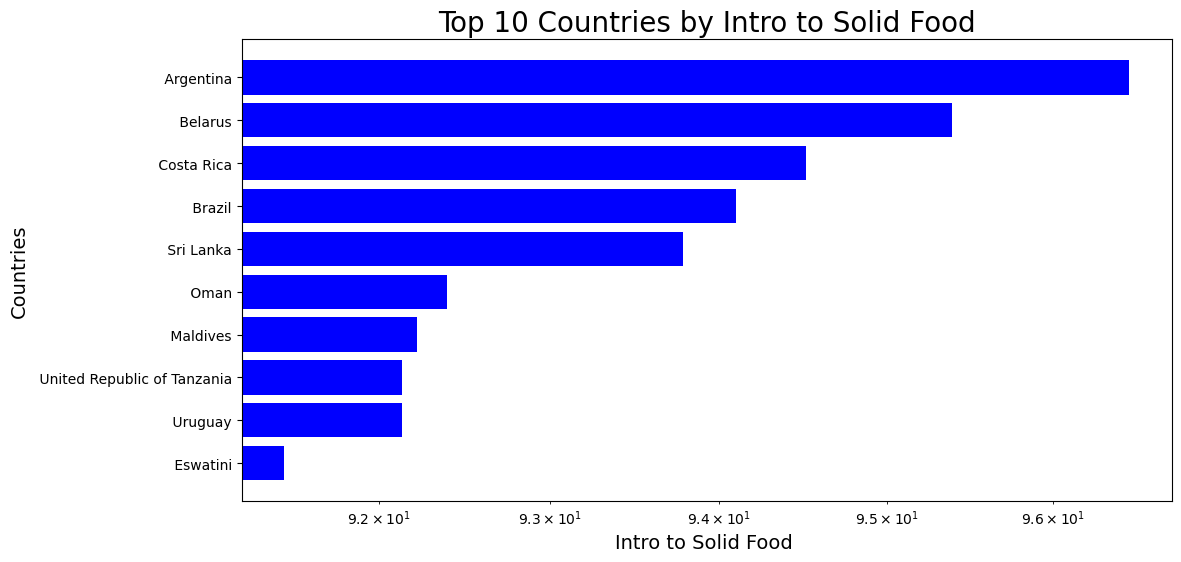

In [53]:
#getting the top countries by intro to solid foods

isf1 = ind.groupby('Country')['Solid_Food'].mean().nlargest(10).sort_values(ascending = True).reset_index(name = 'Solid_Food')
print(isf1)

plt.figure(figsize = [12,6])
plt.xscale('log')
plt.barh(isf1['Country'], isf1['Solid_Food'], color = 'b')
plt.title('Top 10 Countries by Intro to Solid Food', fontsize = 20)
plt.xlabel('Intro to Solid Food ', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MaxSolidfood', bbox_inches = 'tight', dpi = 300)

Introduction to solid or semisolid foods within the early months is also deciding factor to nutritional growth. These countries boast of early introduction to solid foods. They are Argentina with 96.4, Belarus with 95.3 and Costa Rica with score of 94.5

                 Country  Solid_Food
0                  India   52.417021
1                 Guinea   51.295455
2                Liberia   50.660465
3             Uzbekistan   50.600000
4   Syrian Arab Republic   45.152941
5                Eritrea   44.200000
6             Tajikistan   43.631579
7            South Sudan   42.884615
8                   Mali   40.685246
9                Somalia   18.040000


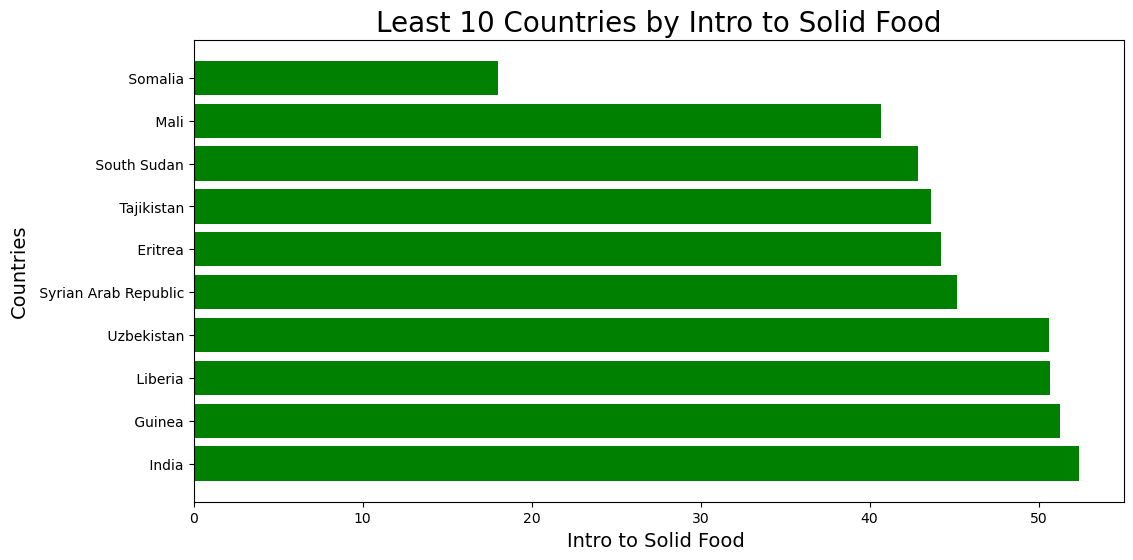

In [54]:
#getting the least countries by intro to solid foods

isf2 = ind.groupby('Country')['Solid_Food'].mean().nsmallest(10).sort_values(ascending = False).reset_index(name = 'Solid_Food')
print(isf2)


plt.figure(figsize = [12,6])
plt.barh(isf2['Country'], isf2['Solid_Food'], color = 'g')
plt.title('Least 10 Countries by Intro to Solid Food', fontsize = 20)
plt.xlabel('Intro to Solid Food ', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MinSolidfood', bbox_inches = 'tight', dpi = 300)

Countries like Somalia, Mali and South Sudan are among the ones that do not expose kids early to solid foods. Their scores are 18.0, 40.6 and 42.8 respectively.

### Annual Observation of the Malnutrition Indicators

In [55]:
#creating a pivot table for year and indicators

yp = uni_df.pivot_table(index='Year', columns='Indicator' ,values="Observation_value", aggfunc = np.mean)

In [56]:
yp.rename(columns = {' Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
yp.rename(columns = {' Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
yp.rename(columns = {' Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
yp.rename(columns = {' Mean BMI-for-age':'BMI_age'}, inplace = True)
yp.rename(columns = {' Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
yp.rename(columns = {' Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
yp.rename(columns = {' Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
yp.rename(columns = {' Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
yp.rename(columns = {' Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [57]:
#converting to a dataframe

yp = yp.reset_index()
yp.head()

Indicator,Year,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
0,2004,97.445302,30.763429,77.177586,0.130171,NaN,16.702092,7.423103,2.587605,6.375788
1,2005,95.108529,26.156394,66.629798,0.327366,NaN,11.836518,6.077773,2.257880,9.824602
2,2006,95.618888,27.058849,60.695299,0.189929,40.98046,13.560014,7.031937,2.390185,8.515253
3,2007,95.445763,29.542326,75.378977,0.027077,NaN,16.882853,8.031859,2.444480,6.352419
4,2008,95.073350,27.754132,78.804225,0.176338,NaN,12.396206,5.434713,1.534775,7.066088


In [58]:
yp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            19 non-null     object 
 1   Breastfed       17 non-null     float64
 2   Stunting        19 non-null     float64
 3   Solid_Food      17 non-null     float64
 4   BMI_age         19 non-null     float64
 5   Meal_Frequency  13 non-null     float64
 6   Underweight     19 non-null     float64
 7   Wasting         19 non-null     float64
 8   Severe_wasting  19 non-null     float64
 9   Overweight      19 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.6+ KB


In [59]:
#filling the null values

yp = yp.fillna(yp.mean())

yp.isnull().sum()

Indicator
Year              0
Breastfed         0
Stunting          0
Solid_Food        0
BMI_age           0
Meal_Frequency    0
Underweight       0
Wasting           0
Severe_wasting    0
Overweight        0
dtype: int64

In [60]:
yp.head()

Indicator,Year,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
0,2004,97.445302,30.763429,77.177586,0.130171,53.606304,16.702092,7.423103,2.587605,6.375788
1,2005,95.108529,26.156394,66.629798,0.327366,53.606304,11.836518,6.077773,2.257880,9.824602
2,2006,95.618888,27.058849,60.695299,0.189929,40.980460,13.560014,7.031937,2.390185,8.515253
3,2007,95.445763,29.542326,75.378977,0.027077,53.606304,16.882853,8.031859,2.444480,6.352419
4,2008,95.073350,27.754132,78.804225,0.176338,53.606304,12.396206,5.434713,1.534775,7.066088


In [61]:
#rearranging the order of the columns

yporder = ['Year', 'BMI_age', 'Breastfed', 'Solid_Food', 'Meal_Frequency', 'Severe_wasting', 'Underweight', 'Stunting', 'Wasting', 'Overweight']
yp = yp[yporder]
yp.head()

Indicator,Year,BMI_age,Breastfed,Solid_Food,Meal_Frequency,Severe_wasting,Underweight,Stunting,Wasting,Overweight
0,2004,0.130171,97.445302,77.177586,53.606304,2.587605,16.702092,30.763429,7.423103,6.375788
1,2005,0.327366,95.108529,66.629798,53.606304,2.257880,11.836518,26.156394,6.077773,9.824602
2,2006,0.189929,95.618888,60.695299,40.980460,2.390185,13.560014,27.058849,7.031937,8.515253
3,2007,0.027077,95.445763,75.378977,53.606304,2.444480,16.882853,29.542326,8.031859,6.352419
4,2008,0.176338,95.073350,78.804225,53.606304,1.534775,12.396206,27.754132,5.434713,7.066088


In [62]:
#converting to a csv

yp.to_csv('YearIndicators.csv', index=False)

1.0 GLOBAL ANNUAL SEVERE WASTING DISTRIBUTION

In [63]:
#grouping years by severe wasting values

ysw = yp.groupby('Year')['Severe_wasting'].mean().reset_index(name= 'Severe_wasting')
ysw.head()

,Year,Severe_wasting
0,2004,2.587605
1,2005,2.257880
2,2006,2.390185
3,2007,2.444480
4,2008,1.534775


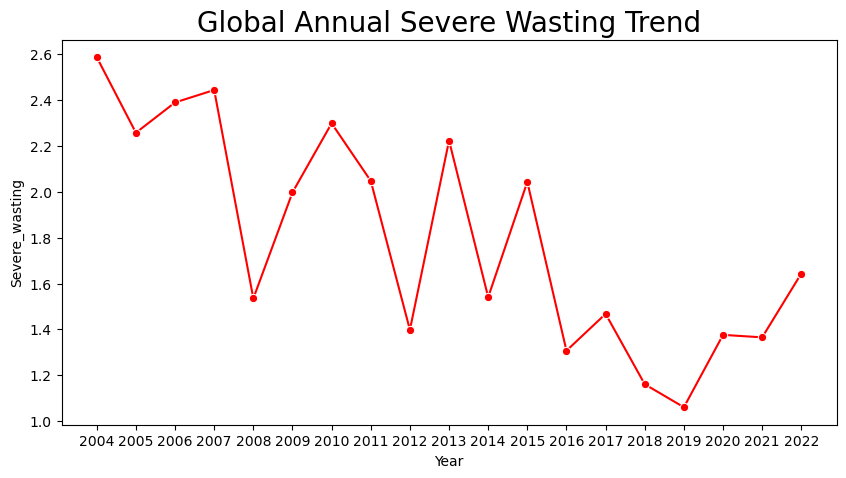

In [64]:
#plotting the annual severe wasting distribution trend

plt.figure(figsize = [10,5])
sns.lineplot(data = ysw, x = 'Year', y = 'Severe_wasting', marker = 'o', color ='r')
plt.title('Global Annual Severe Wasting Trend', fontsize = 20)
plt.savefig('SevereWastingTrend', bbox_inches = 'tight', dpi = 300)

From the chart above, the year 2019 seems to have had the lowest cases of Severe wasting but unfortunately the cases seems to be on the rise again after 2019.

2.0 GLOBAL ANNUAL UNDERWEIGHT DISTRIBUTION

In [65]:
#grouping the year by the underweight values

yuw = yp.groupby('Year')['Underweight'].mean().reset_index(name='Underweight')
yuw.head()

,Year,Underweight
0,2004,16.702092
1,2005,11.836518
2,2006,13.560014
3,2007,16.882853
4,2008,12.396206


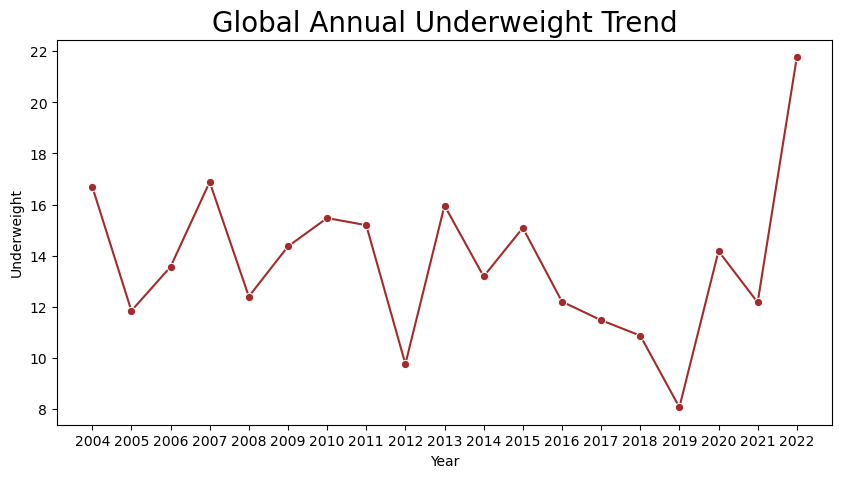

In [66]:
#plotting the annual underweight distribution trend

plt.figure(figsize = [10,5])
sns.lineplot(data = yuw, x = 'Year', y = 'Underweight', marker = 'o', color ='brown')
plt.title('Global Annual Underweight Trend', fontsize = 20)
plt.savefig('UnderweightTrend', bbox_inches = 'tight', dpi = 300)

Underweight cases is peaking presently after  slight drop in 2020 - 2021 as shown in the chart above. 

3.0 GLOBAL ANNUAL STUNTING DISTRIBUTION

In [67]:
#grouping year by stunting values

yst = yp.groupby('Year')['Stunting'].mean().reset_index(name= 'Stunting')
yst.head()

,Year,Stunting
0,2004,30.763429
1,2005,26.156394
2,2006,27.058849
3,2007,29.542326
4,2008,27.754132


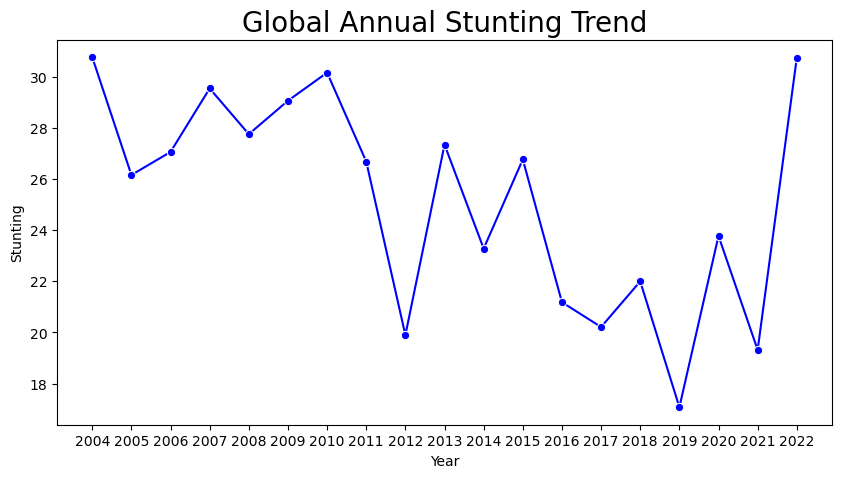

In [68]:
#plotting the annual stunting distribution trend

plt.figure(figsize = [10,5])
sns.lineplot(data = yst, x = 'Year', y = 'Stunting', marker = 'o', color ='b')
plt.title('Global Annual Stunting Trend', fontsize = 20)
plt.savefig('StuntingTrend', bbox_inches = 'tight', dpi = 300)

Stunting cases globally is on its peak replicating its value in the year 2004.

4.0 GLOBAL ANNUAL WASTING DISTRIBUTION

In [69]:
#grouping the year by the wasting values

ywt = yp.groupby('Year')['Wasting'].mean().reset_index(name= 'Wasting')
ywt.head()

,Year,Wasting
0,2004,7.423103
1,2005,6.077773
2,2006,7.031937
3,2007,8.031859
4,2008,5.434713


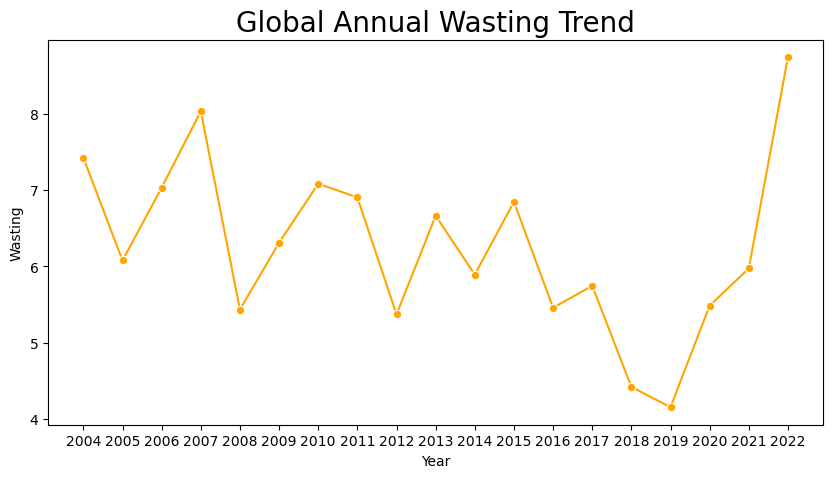

In [70]:
#plotting the annual wasting distribution trend

plt.figure(figsize = [10,5])
sns.lineplot(data = ywt, x = 'Year', y = 'Wasting', marker = 'o', color ='orange')
plt.title('Global Annual Wasting Trend', fontsize = 20)
plt.savefig('WastingTrend', bbox_inches = 'tight', dpi = 300)

The Global annual wasting index is as well on an infinite rise since a low in the year 2019. 

5.0 GLOBAL ANNUAL OVERWEIGHT DISTRIBUTION

In [71]:
#grouping the year by the overweight score

yow = yp.groupby('Year')['Overweight'].mean().reset_index(name= 'Overweight')
yow.head()

,Year,Overweight
0,2004,6.375788
1,2005,9.824602
2,2006,8.515253
3,2007,6.352419
4,2008,7.066088


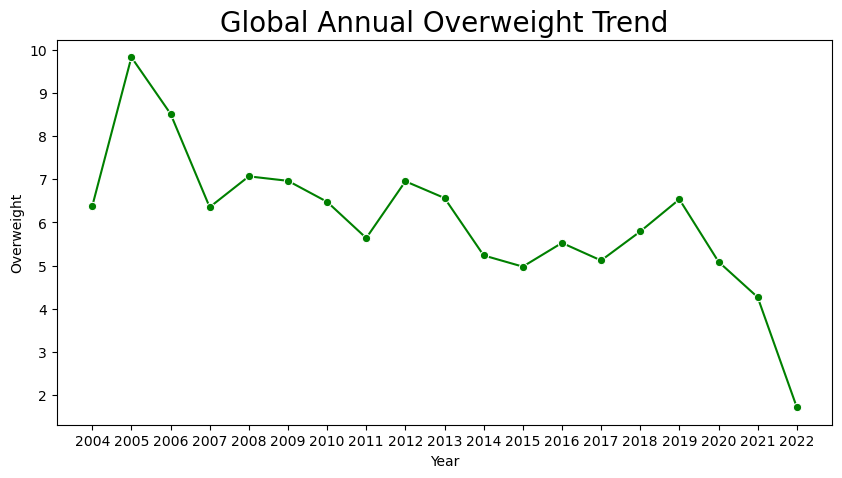

In [72]:
#plotting the annual overweight distribution trend

plt.figure(figsize = [10,5])
sns.lineplot(data = yow, x = 'Year', y = 'Overweight', marker = 'o', color ='g')
plt.title('Global Annual Overweight Trend', fontsize = 20)
plt.savefig('OverweightTrend', bbox_inches = 'tight', dpi = 300)

More people are becoming less overweight. This is shown in the chart above because of the systemic decrease in the global annual trend.

### How Residential Area Types Affects Malnutrition Indicators

In [73]:
#creating a pivot table for the residence types and the indicators

res = uni_df.pivot_table(index = 'Residence', columns="Indicator", values= 'Observation_value', aggfunc = np.mean)
res

Indicator,Ever breastfed (0-23 months),Height-for-age <-2 SD (stunting),"Introduction to solid, semi-solid foods (6-8 months)",Mean BMI-for-age,Minimum meal frequency (children aged 6 to 23 months),Weight-for-age <-2 SD (Underweight),Weight-for-height <-2 SD (wasting),Weight-for-height <-3 SD (severe wasting),Weight-for-height >+2 SD (overweight)
Residence,,,,,,,,,
Rural,96.051157,25.999772,72.229866,0.152755,51.266321,13.004613,5.872806,1.805652,6.589737
Suburban,95.726813,24.886333,74.322158,0.096714,53.117936,13.419061,6.175064,1.798001,6.240306
Urban,95.444269,22.006057,77.251515,0.172097,55.538974,11.232781,5.720322,1.816288,7.275703


In [74]:
#convert to dataframe

res = res.reset_index()
res

Indicator,Residence,Ever breastfed (0-23 months),Height-for-age <-2 SD (stunting),"Introduction to solid, semi-solid foods (6-8 months)",Mean BMI-for-age,Minimum meal frequency (children aged 6 to 23 months),Weight-for-age <-2 SD (Underweight),Weight-for-height <-2 SD (wasting),Weight-for-height <-3 SD (severe wasting),Weight-for-height >+2 SD (overweight)
0,Rural,96.051157,25.999772,72.229866,0.152755,51.266321,13.004613,5.872806,1.805652,6.589737
1,Suburban,95.726813,24.886333,74.322158,0.096714,53.117936,13.419061,6.175064,1.798001,6.240306
2,Urban,95.444269,22.006057,77.251515,0.172097,55.538974,11.232781,5.720322,1.816288,7.275703


In [75]:
res.rename(columns = {' Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
res.rename(columns = {' Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
res.rename(columns = {' Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
res.rename(columns = {' Mean BMI-for-age':'BMI_age'}, inplace = True)
res.rename(columns = {' Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
res.rename(columns = {' Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
res.rename(columns = {' Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
res.rename(columns = {' Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
res.rename(columns = {' Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [76]:
res

Indicator,Residence,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
0,Rural,96.051157,25.999772,72.229866,0.152755,51.266321,13.004613,5.872806,1.805652,6.589737
1,Suburban,95.726813,24.886333,74.322158,0.096714,53.117936,13.419061,6.175064,1.798001,6.240306
2,Urban,95.444269,22.006057,77.251515,0.172097,55.538974,11.232781,5.720322,1.816288,7.275703


In [77]:
#rearranging the order of the columns

resorder = ['Residence', 'BMI_age', 'Breastfed', 'Solid_Food', 'Meal_Frequency', 'Severe_wasting', 'Underweight', 'Stunting', 'Wasting', 'Overweight']
res = res[resorder]
res.head()

Indicator,Residence,BMI_age,Breastfed,Solid_Food,Meal_Frequency,Severe_wasting,Underweight,Stunting,Wasting,Overweight
0,Rural,0.152755,96.051157,72.229866,51.266321,1.805652,13.004613,25.999772,5.872806,6.589737
1,Suburban,0.096714,95.726813,74.322158,53.117936,1.798001,13.419061,24.886333,6.175064,6.240306
2,Urban,0.172097,95.444269,77.251515,55.538974,1.816288,11.232781,22.006057,5.720322,7.275703


In [78]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Residence       3 non-null      object 
 1   BMI_age         3 non-null      float64
 2   Breastfed       3 non-null      float64
 3   Solid_Food      3 non-null      float64
 4   Meal_Frequency  3 non-null      float64
 5   Severe_wasting  3 non-null      float64
 6   Underweight     3 non-null      float64
 7   Stunting        3 non-null      float64
 8   Wasting         3 non-null      float64
 9   Overweight      3 non-null      float64
dtypes: float64(9), object(1)
memory usage: 368.0+ bytes


In [79]:
res.isnull().sum()

Indicator
Residence         0
BMI_age           0
Breastfed         0
Solid_Food        0
Meal_Frequency    0
Severe_wasting    0
Underweight       0
Stunting          0
Wasting           0
Overweight        0
dtype: int64

In [80]:
res.to_csv('ResidenceIndicator.csv', index=False)

1.0 RESIDENCE AND MINIMUM MEAL FREQUENCY

In [81]:
#group residence by meal freq

rmf = res.groupby('Residence')['Meal_Frequency'].mean().reset_index(name= 'Meal_Freq')
rmf

,Residence,Meal_Freq
0,Rural,51.266321
1,Suburban,53.117936
2,Urban,55.538974


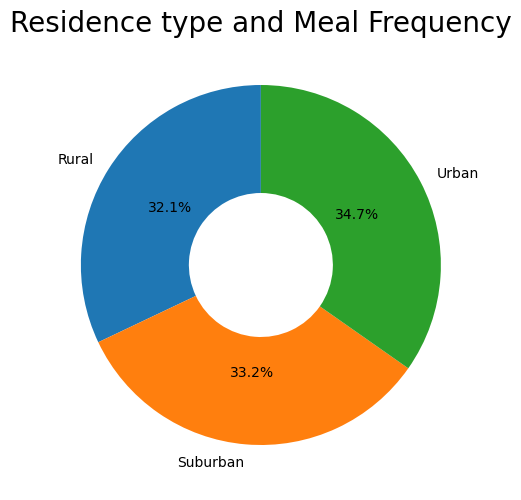

In [82]:
# Create a donut chart
plt.pie(rmf['Meal_Freq'], labels=rmf['Residence'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Residence type and Meal Frequency', fontsize = 20)
plt.savefig('ResidenceMealFreq', bbox_inches = 'tight', dpi = 300)

This chart shows that the residents of Urban settlements have the most mel frequency with 34.7% followed by the Suburban with 33.2%  and then the Rural settlers with 32.1% 

2.0 RESIDENCE AND EARLY INTRO TO SOLID FOODS

In [83]:
#group residence by intro to solid foods

rsf = res.groupby('Residence')['Solid_Food'].mean().reset_index(name= 'Solid_Food')
rsf

,Residence,Solid_Food
0,Rural,72.229866
1,Suburban,74.322158
2,Urban,77.251515


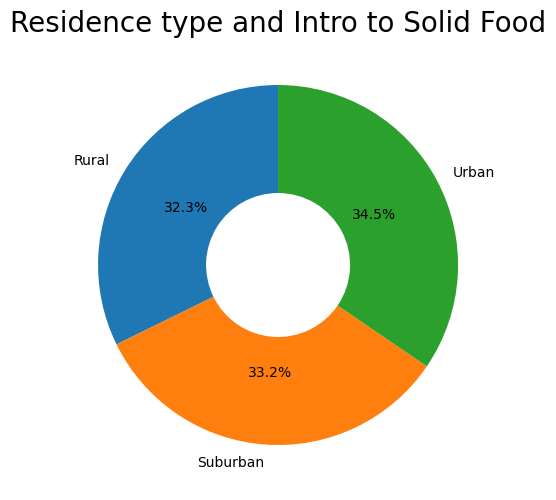

In [84]:
# Create a donut chart
plt.pie(rsf['Solid_Food'], labels=rsf['Residence'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Residence type and Intro to Solid Food', fontsize = 20)
plt.savefig('ResidenceSolidFood', bbox_inches = 'tight', dpi = 300)

Also the Urban settlers introduce kids to solid foods earlier than the others. Suburban settlement follows and the Rural residents comes last.

3.0 RESIDENCE AND BREAST FEEDING

In [85]:
#group residence by breastfeeding

rbf = res.groupby('Residence')['Breastfed'].mean().reset_index(name= 'Breastfed')
rbf

,Residence,Breastfed
0,Rural,96.051157
1,Suburban,95.726813
2,Urban,95.444269


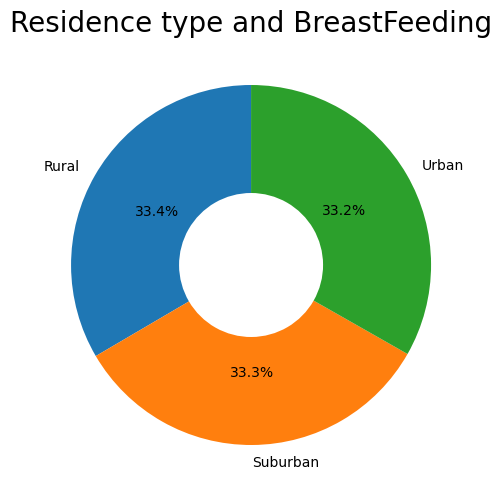

In [86]:
# Create a donut chart
plt.pie(rbf['Breastfed'], labels=rbf['Residence'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Residence type and BreastFeeding', fontsize = 20)
plt.savefig('ResidenceBreastfed', bbox_inches = 'tight', dpi = 300)


On matters of breast feeding, it has been shown that the rural residents tops the chart with 33.4% followed by the suburban at 33.3% and the urban residents at 33.2%.

4.0 RESIDENCE AND MALNUTRITION INDICATORS

In [87]:
res

Indicator,Residence,BMI_age,Breastfed,Solid_Food,Meal_Frequency,Severe_wasting,Underweight,Stunting,Wasting,Overweight
0,Rural,0.152755,96.051157,72.229866,51.266321,1.805652,13.004613,25.999772,5.872806,6.589737
1,Suburban,0.096714,95.726813,74.322158,53.117936,1.798001,13.419061,24.886333,6.175064,6.240306
2,Urban,0.172097,95.444269,77.251515,55.538974,1.816288,11.232781,22.006057,5.720322,7.275703


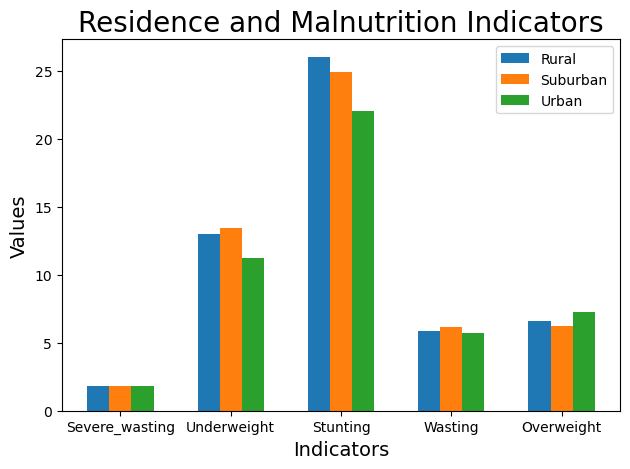

In [88]:
#plotting the residence types against malnutrition indicators

indicators = ['Severe_wasting', 'Underweight', 'Stunting', 'Wasting', 'Overweight']
Rural = [1.805652, 13.004613, 25.999772, 5.872806,  6.589737]
Suburban = [1.798001, 13.419061, 24.886333, 6.175064, 6.240306]
Urban = [1.816288, 11.232781, 22.006057, 5.720322, 7.275703]

# Calculate the width of each bar group
bar_width = 0.2
bar1 = np.arange(len(indicators))
bar2 = [pos + bar_width for pos in bar1]
bar3 = [pos + bar_width for pos in bar2]

# Create the bar plot with three bars for each category
plt.bar(bar1, Rural, width=bar_width, label='Rural')
plt.bar(bar2, Suburban, width=bar_width, label='Suburban')
plt.bar(bar3, Urban, width=bar_width, label='Urban')

# Customize the plot
plt.xlabel('Indicators', fontsize = 14)
plt.ylabel('Values', fontsize = 14)
plt.title('Residence and Malnutrition Indicators', fontsize =20)
plt.xticks([pos + bar_width for pos in bar1], indicators)
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('ResidenceMalnutrition', bbox_inches = 'tight', dpi = 300)

From the chart above, Severe wasting seems to be on the same level across all settlements, In Underweight, more cases are found in the Suburbs same goes with Wasting while for Stunting, the Rurals suffer it most and in the Overweight, more cases are in the Urban center.


### How Maternal Education Affects Malnutrition Indicators

In [89]:
uni_df.head()

,Country,Year,Residence,Indicator,Maternal_Education,Observation_value
0,Afghanistan,2015,Suburban,Ever breastfed (0-23 months),Educated,98.2
1,Afghanistan,2015,Suburban,Ever breastfed (0-23 months),Educated,97.4
2,Afghanistan,2015,Rural,Ever breastfed (0-23 months),Educated,98.6
3,Afghanistan,2015,Urban,Ever breastfed (0-23 months),Educated,99.1
4,Afghanistan,2015,Rural,Ever breastfed (0-23 months),Educated,98.3


In [90]:
#creating a pivot table for the maternal education and the indicators

mel = uni_df.pivot_table(index = 'Maternal_Education', columns="Indicator", values= 'Observation_value', aggfunc = np.mean)
mel

Indicator,Ever breastfed (0-23 months),Height-for-age <-2 SD (stunting),"Introduction to solid, semi-solid foods (6-8 months)",Mean BMI-for-age,Minimum meal frequency (children aged 6 to 23 months),Weight-for-age <-2 SD (Underweight),Weight-for-height <-2 SD (wasting),Weight-for-height <-3 SD (severe wasting),Weight-for-height >+2 SD (overweight)
Maternal_Education,,,,,,,,,
Educated,95.730853,24.624004,74.819029,0.112194,53.383252,13.084998,6.079744,1.797070,6.403411
Uneducated,96.274790,35.759375,63.964024,-0.015207,43.803448,19.559009,7.622072,2.385909,4.723111


In [91]:
#converting to a dataframe

mel = mel.reset_index()
mel.head()

Indicator,Maternal_Education,Ever breastfed (0-23 months),Height-for-age <-2 SD (stunting),"Introduction to solid, semi-solid foods (6-8 months)",Mean BMI-for-age,Minimum meal frequency (children aged 6 to 23 months),Weight-for-age <-2 SD (Underweight),Weight-for-height <-2 SD (wasting),Weight-for-height <-3 SD (severe wasting),Weight-for-height >+2 SD (overweight)
0,Educated,95.730853,24.624004,74.819029,0.112194,53.383252,13.084998,6.079744,1.797070,6.403411
1,Uneducated,96.274790,35.759375,63.964024,-0.015207,43.803448,19.559009,7.622072,2.385909,4.723111


In [92]:
mel.rename(columns = {' Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
mel.rename(columns = {' Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
mel.rename(columns = {' Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
mel.rename(columns = {' Mean BMI-for-age':'BMI_age'}, inplace = True)
mel.rename(columns = {' Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
mel.rename(columns = {' Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
mel.rename(columns = {' Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
mel.rename(columns = {' Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
mel.rename(columns = {' Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [93]:
mel

Indicator,Maternal_Education,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
0,Educated,95.730853,24.624004,74.819029,0.112194,53.383252,13.084998,6.079744,1.797070,6.403411
1,Uneducated,96.274790,35.759375,63.964024,-0.015207,43.803448,19.559009,7.622072,2.385909,4.723111


In [94]:
mel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Maternal_Education  2 non-null      object 
 1   Breastfed           2 non-null      float64
 2   Stunting            2 non-null      float64
 3   Solid_Food          2 non-null      float64
 4   BMI_age             2 non-null      float64
 5   Meal_Frequency      2 non-null      float64
 6   Underweight         2 non-null      float64
 7   Wasting             2 non-null      float64
 8   Severe_wasting      2 non-null      float64
 9   Overweight          2 non-null      float64
dtypes: float64(9), object(1)
memory usage: 288.0+ bytes


In [95]:
mel.isnull().sum()

Indicator
Maternal_Education    0
Breastfed             0
Stunting              0
Solid_Food            0
BMI_age               0
Meal_Frequency        0
Underweight           0
Wasting               0
Severe_wasting        0
Overweight            0
dtype: int64

In [96]:
#rearranging the order of the columns

melorder = ['Maternal_Education', 'BMI_age', 'Breastfed', 'Solid_Food', 'Meal_Frequency', 'Severe_wasting', 'Underweight', 'Stunting', 'Wasting', 'Overweight']
mel = mel[melorder]
mel.head()

Indicator,Maternal_Education,BMI_age,Breastfed,Solid_Food,Meal_Frequency,Severe_wasting,Underweight,Stunting,Wasting,Overweight
0,Educated,0.112194,95.730853,74.819029,53.383252,1.797070,13.084998,24.624004,6.079744,6.403411
1,Uneducated,-0.015207,96.274790,63.964024,43.803448,2.385909,19.559009,35.759375,7.622072,4.723111


In [97]:
#converting to csv

mel.to_csv('MaternalEduIndicators.csv', index=False)

1.0 MATERNAL EDUCATION LEVEL AND BREASTFEEDING

In [98]:
#grouping maternal education and breastfeeding

meb = mel.groupby('Maternal_Education')['Breastfed'].mean().reset_index()
meb

,Maternal_Education,Breastfed
0,Educated,95.730853
1,Uneducated,96.274790


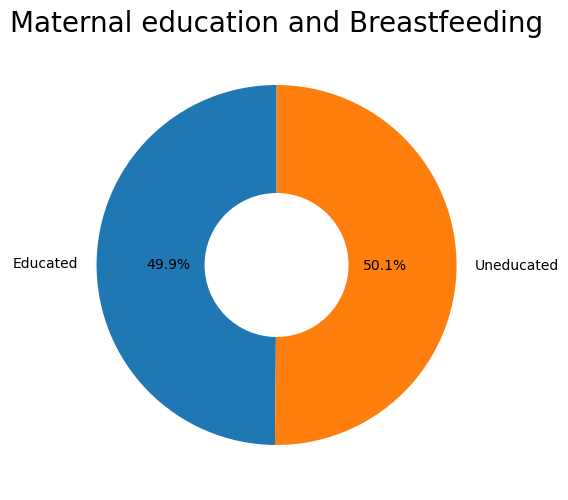

In [99]:
# Create a donut chart
plt.pie(meb['Breastfed'], labels=meb['Maternal_Education'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Maternal education and Breastfeeding', fontsize=20)
plt.savefig('MateduBreastfeed', bbox_inches = 'tight', dpi = 300)


As seen in the chart, the Uneducated seem to breastfed more with a score of 50.1% than the Educated peeged at 49.9%

2.0 MATERNAL EDUCATION LEVEL AND INTRO TO SOLID FOOD

In [100]:
msf = mel.groupby('Maternal_Education')['Solid_Food'].mean().reset_index()
msf

,Maternal_Education,Solid_Food
0,Educated,74.819029
1,Uneducated,63.964024


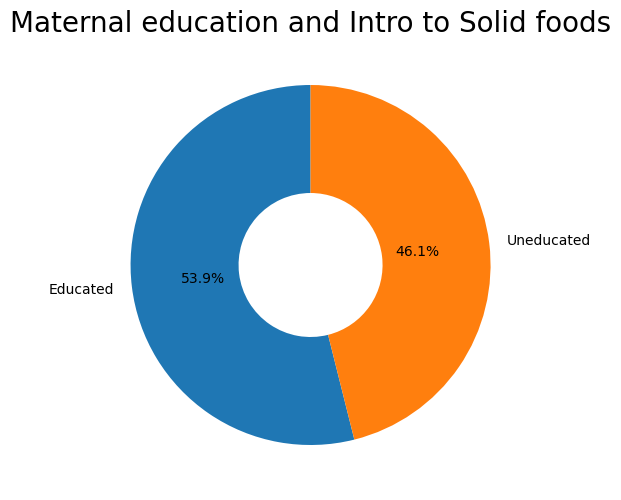

In [101]:
# Create a donut chart
plt.pie(msf['Solid_Food'], labels=msf['Maternal_Education'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Maternal education and Intro to Solid foods', fontsize=20)
plt.savefig('MateduSolidfood', bbox_inches = 'tight', dpi = 300)

In the early introduction to solid food, the educated mothers introduce kids to solid food earlier than the uneducated ones with a score ratio of 53.9 : 46.1 respectively.  

3.0 MATERNAL EDUCATION LEVEL AND MEAL FREQUENCY

In [102]:
mml = mel.groupby('Maternal_Education')['Meal_Frequency'].mean().reset_index()
mml

,Maternal_Education,Meal_Frequency
0,Educated,53.383252
1,Uneducated,43.803448


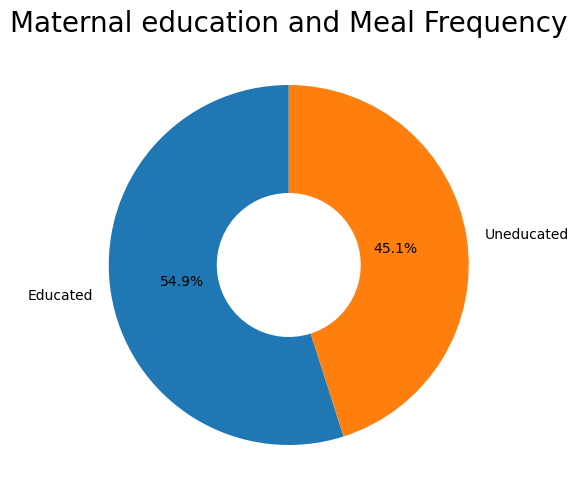

In [103]:
# Create a donut chart
plt.pie(mml['Meal_Frequency'], labels=mml['Maternal_Education'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Maternal education and Meal Frequency', fontsize=20)
plt.savefig('MateduMealFreq', bbox_inches = 'tight', dpi = 300)


Also Educated mothers facilitate a higher minimum meal frequency at 54.9% than the Uneducated mothers at 45.1% as shown in this chart above

4.0 MATERNAL EDUCATION LEVEL AND MALNUTRITION INDICATORS

In [104]:
mel

Indicator,Maternal_Education,BMI_age,Breastfed,Solid_Food,Meal_Frequency,Severe_wasting,Underweight,Stunting,Wasting,Overweight
0,Educated,0.112194,95.730853,74.819029,53.383252,1.797070,13.084998,24.624004,6.079744,6.403411
1,Uneducated,-0.015207,96.274790,63.964024,43.803448,2.385909,19.559009,35.759375,7.622072,4.723111


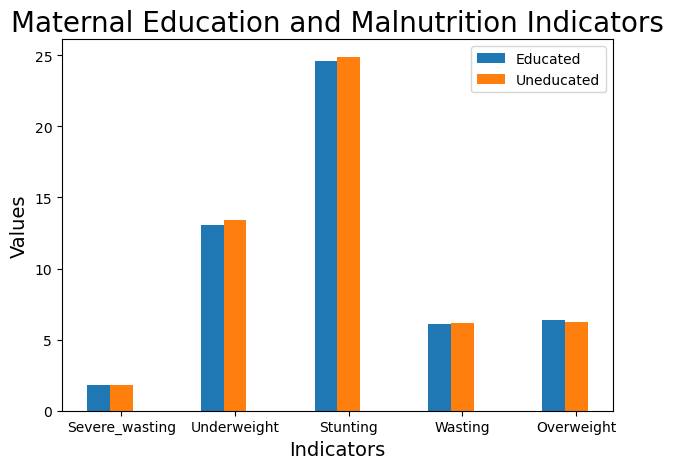

In [105]:
#plotting the residence types against malnutrition indicators

melindicators = ['Severe_wasting', 'Underweight', 'Stunting', 'Wasting', 'Overweight']
Educated = [1.797070, 13.084998, 24.624004, 6.079744, 6.403411]
Uneducated = [2.385909, 19.559009, 35.759375, 7.622072, 4.723111]

# Calculate the width of each bar group
melbar_width = 0.2
melbar1 = np.arange(len(indicators))
melbar2 = [pos + bar_width for pos in bar1]

# Create the bar plot with three bars for each category
plt.bar(melbar1, Educated, width=melbar_width, label='Educated')
plt.bar(melbar2, Suburban, width=melbar_width, label='Uneducated')

# Customize the plot
plt.xlabel('Indicators', fontsize = 14)
plt.ylabel('Values', fontsize = 14)
plt.title('Maternal Education and Malnutrition Indicators', fontsize =20)
plt.xticks([pos + melbar_width for pos in bar1], melindicators)
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('MatEduMalnutrition', bbox_inches = 'tight', dpi = 300)

Taking a look at the malnutrition indicators and maternal education, the educated and uneducated mothers are on same level as regards Severe wasting but the uneducated tops their counterpart slightly in Underweight, stunting and Wasting. Whereas the Educated mothers tend to have more overweight kids than their uneducated counterpart.

### OBSERVATIONS

The analysis covers a time period of 19 years observation starting from 2004 to 2022.

South Sudan is the country affected mostly by Severe wasting with a score of 10.1, followed by India with 7.0 score and Papua New Guinea with 6.38

The countries experiencing the least severe wasting are Poland, Latvia, and Belgium have zero case of severe wasting

The top countries having the most underweight cases over the time period are Timor-Leste with 40.05, Eritrea with 38.5, and Yemen with 38.07 followed by India with a score of 35.6

Latvia is safe and has no case of Underweight at all. Turks and Caicos islands, Austraila and Estonia comes next in the list of countries not having underweight cases amongst their children with scores of 0.41, 0.50 and 0.53 respectively.

Again, South Sudan tops the chart of most countries with wastin cases with a score of 22.4. India follows closely with a score of 19.4 then Sri lanka with a score of 15.9

Some countries such as the United Kingdom, Austraila and Chile boasts of having the least wasting cases with wasting scores 0f 0.17, 0.20 and 0.31 respectively.

Stunting cases are on the rise but the most affected countries happen to be Burundi with a score of 54.3, Timor-Leste with 52.6 and then Eritrea with score of 51.0

Some countries seems less affected by the high rise of stunting cases. Latvia, Poland, Estonia and Germany happens to sit comfortably on the top of the least affected with scores of 0.54, 0.94, 1.17 and 1.21 respectively.

In Libya, there is a very high case of overweight with a score of 25.1. Other countries most affected are Bosnia and Herzegovina with score of 21.3 follwed by Albania with 21.2

Overweight seems not to be popular amongst kids in Djibouti, Niger and Burkina Faso because their scores seems the lowest sitting at 0.74, 0.75 and 1.07 respectively.

Turkmenistan, Serbia and El Salvador happen to be countries that the highest scores for the minimum meal frequency. This implies that they do not miss meals. The scores are 94.8, 90.7 and 86.5 respectively.

There are countries that can not boast of the fact that they do not miss meals. South Sudan, Central African Republic and Uzbekistan happens to be the top 3 of least countries with minimum meal frequency.

No doubt that breastfeeding affects the nutritional growth of a child. Countries that boast of consistent breastfeeding are Democratic People's Republic of Korea with score of 99.4, followed by Sri Lanka with 99.3 and then Bhutan with 99.1.

The United States sits on the top of countries that has reduced breastfeeding with a score of 72.6, followed by Botswana with 80.5 and South Africa with score of 82.2

Introduction to solid or semisolid foods within the early months is also deciding factor to nutritional growth. These countries boast of early introduction to solid foods. They are Argentina with 96.4, Belarus with 95.3 and Costa Rica with score of 94.5

Countries like Somalia, Mali and South Sudan are among the ones that do not expose kids early to solid foods. Their scores are 18.0, 40.6 and 42.8 respectively.

The year 2019 seems to have had the lowest cases of Severe wasting but unfortunately the cases seems to be on the rise again after 2019.

Underweight cases is peaking presently after slight drop in 2020 - 2021.

Stunting cases globally is on its peak replicating its value in the year 2004.

The Global annual wasting index is as well on an infinite rise since a low in the year 2019.

More people are becoming less overweight. This is because of the systemic decrease in the global annual overweight trend.

The residents of Urban settlements have the most meal frequency with 34.7% followed by the Suburban with 33.2% and then the Rural settlers with 32.1%

Also the Urban settlers introduce kids to solid foods earlier than the others. Suburban settlement follows and the Rural residents comes last.

On matters of breast feeding, it has been shown that the rural residents tops the chart with 33.4% followed by the suburban at 33.3% and the urban residents at 33.2%.

Severe wasting seems to be on the same level across all settlements, In Underweight, more cases are found in the Suburbs same goes with Wasting while for Stunting, the Rurals suffer it most and in the Overweight, more cases are in the Urban center.

On breastfeeding, the Uneducated seem to breastfed more with a score of 50.1% than the Educated peeged at 49.9%

In the early introduction to solid food, the educated mothers introduce kids to solid food earlier than the uneducated ones with a score ratio of 53.9 : 46.1 respectively.

Also Educated mothers facilitate a higher minimum meal frequency at 54.9% than the Uneducated mothers at 45.1%

Taking a look at the malnutrition indicators and maternal education, the educated and uneducated mothers are on same level as regards Severe wasting but the uneducated tops their counterpart slightly in Underweight, stunting and Wasting. Whereas the Educated mothers tend to have more overweight kids than their uneducated counterpart.